# <font color="#1d479b">Clustering on high-dimensional data</font>

In [2]:
%matplotlib inline
from IPython import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pylab as pl
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.precision = 2
plt.rcParams['figure.figsize'] = (10, 7)

## <font color="#337da4">Drop Outliers:  DBSCAN</font>

In [382]:
data = pd.read_csv("5.csv", index_col="customer_unique_id")
data = data.dropna(axis='rows')
print(data.shape)
data.head()

(98562, 23)


,price,freight_value,payment_sequential,review_score,order_purchase_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,
639d23421f5517f69d0c3d6e6564cf0e,0.11,-5.33e-01,-0.09,-2.24,2018-03-19 18:40:33,1.01,-0.45,-0.71,-0.32,-0.12,-0.92,-0.31,-1.19,0,1,0,1,0,0,0,0,0,1
742405ae9634962bb67f54214a8247c9,-0.06,9.42e-03,-0.09,0.69,2017-12-03 17:28:57,-1.09,0.36,-0.71,-0.32,-0.15,-0.14,-0.20,0.29,0,1,0,1,0,0,1,0,0,0
b813fe59b2d10fb59d5594ec8f91750e,0.02,-6.84e-01,-0.09,0.69,2018-03-12 11:56:58,-0.09,-0.70,-0.71,-0.32,-0.15,-0.97,-0.84,-0.30,0,1,0,1,0,0,0,0,1,0
c76c0ebec1c44b44dca88e42b23149f1,-0.46,1.08e-01,-0.09,-0.05,2017-04-13 02:11:17,-0.29,0.33,-0.71,-0.32,-0.25,1.42,0.96,0.10,0,1,1,0,0,0,0,1,0,0
c4750b080e135d87328222826982fe39,1.14,-4.49e-01,-0.09,-0.05,2017-03-05 19:25:45,0.31,0.67,-0.13,-0.32,0.14,-0.41,-0.42,0.10,0,1,0,1,0,0,0,0,0,1


In [384]:
data = data.drop(labels=["order_purchase_timestamp"], axis=1)
data.shape

(98562, 22)

DBSCAN:

- Quand Epsilon est très petit, tous les points sont très éloignés l’un des autres. Il n’y alors aucun cluster, puisque tous les points sont isolés et sont des **outliers**. 
- En augmentant epsilon, les clusters deviennent plus nombreux. 
- Si epsilon est très grand, alors tous les points sont dans le même cluster.


L’algorithme cherche les groupes de points proches. Pour cela, il recherche, pour chaque point, les points faisant partie de son voisinage immédiat, et il regroupe tous les points atteignables de proche en proche. Une fois tous les points regroupés, les groupes de points sont considérés soit comme des clusters soit comme des **valeurs aberrantes**, si le nombre d’observations est inférieur à MinPoints.

"If there are more than minPoints points within a distance of epsilon from that point, (including the original point itself), we consider all of them to be part of a "cluster"

In [190]:
from sklearn.cluster import DBSCAN

X_scaled = data.values

clusters = DBSCAN(eps=1.5) 
clusters.fit(X_scaled) 
#time = 5 min

DBSCAN(eps=1.5)

- eps = 4 > kernek dead
- eps = 3,5 > ok mais pas suffisamment de outliers pour former des groupes homogènes dans l'AgglomerativeClustering
- eps = 3 et  17 labels > ok mais pas suffisamment de outliers pour former des groupes homogènes dans l'AgglomerativeClustering
- eps = 2.5 et  25 labels > 

In [191]:
outliers = data[clusters.labels_==-1]
print(outliers.shape)
outliers.head() #(647, 27), (642, 22)

(11949, 22)


,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,
56e13e0df5638bab891c57803411dfb4,2.52,0.10,-0.09,-0.05,0.61,0.58,-0.71,-0.32,0.49,1.60,0.22,0.39,0,1,0,1,0,0,0,0,0,1
36445bb429c8bb13c3f8cd6794723647,-0.46,0.86,-0.09,0.69,-0.29,0.33,-0.71,2.29,0.18,1.42,-0.20,0.79,0,1,0,1,0,0,1,0,0,0
36445bb429c8bb13c3f8cd6794723647,-0.52,-1.26,-0.09,0.69,-0.99,0.64,-0.71,2.29,0.18,1.42,-0.20,0.79,0,1,0,1,0,0,1,0,0,0
36445bb429c8bb13c3f8cd6794723647,-0.52,-1.26,-0.09,0.69,-0.99,0.64,-0.71,2.29,0.18,1.42,-0.20,0.59,0,1,0,1,0,0,0,0,0,1
d55b1d8c88528efb311e84d850c4914e,-0.26,0.62,-0.09,0.69,-0.89,2.44,-0.71,-0.32,-0.19,3.45,1.17,1.08,0,1,0,1,0,0,0,0,1,0


In [192]:
#Add "dbscan_cluster" column - 17 clusters

#dict
dbscan_mapping = {case: cluster for case, cluster in enumerate(clusters.labels_)} #(98561,)

#Dict  to list
cluster = []
for k,v in dbscan_mapping.items():
    cluster.append(v)
    
data["dbscan_cluster"] = cluster 

print(data["dbscan_cluster"].nunique())
data["dbscan_cluster"].unique()

63


array([ 0, -1,  1,  2, 22, 24, 36,  3, 34,  4, 20, 37,  5,  6, 57,  7, 59,
        8,  9, 10, 11, 15, 60, 45, 23, 46, 13, 12, 14, 55, 58, 16, 17, 18,
       19, 21, 27, 29, 26, 51, 25, 35, 56, 40, 28, 30, 31, 32, 33, 41, 38,
       39, 43, 42, 44, 52, 47, 48, 49, 50, 53, 61, 54])

In [193]:
data.head()

,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night,dbscan_cluster
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,
639d23421f5517f69d0c3d6e6564cf0e,0.11,-5.33e-01,-0.09,-2.24,1.01,-0.45,-0.71,-0.32,-0.12,-0.92,-0.31,-1.19,0,1,0,1,0,0,0,0,0,1,0
742405ae9634962bb67f54214a8247c9,-0.06,9.42e-03,-0.09,0.69,-1.09,0.36,-0.71,-0.32,-0.15,-0.14,-0.20,0.29,0,1,0,1,0,0,1,0,0,0,0
b813fe59b2d10fb59d5594ec8f91750e,0.02,-6.84e-01,-0.09,0.69,-0.09,-0.70,-0.71,-0.32,-0.15,-0.97,-0.84,-0.30,0,1,0,1,0,0,0,0,1,0,0
c76c0ebec1c44b44dca88e42b23149f1,-0.46,1.08e-01,-0.09,-0.05,-0.29,0.33,-0.71,-0.32,-0.25,1.42,0.96,0.10,0,1,1,0,0,0,0,1,0,0,0
c4750b080e135d87328222826982fe39,1.14,-4.49e-01,-0.09,-0.05,0.31,0.67,-0.13,-0.32,0.14,-0.41,-0.42,0.10,0,1,0,1,0,0,0,0,0,1,0


In [194]:
data.shape

(98562, 23)

In [195]:
#save results
data.to_csv("6.csv",index=True)

In [385]:
data = pd.read_csv("6.csv")
data = data.set_index("customer_unique_id")
print(data.shape)
data.head()

(98562, 23)


,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night,dbscan_cluster
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,
639d23421f5517f69d0c3d6e6564cf0e,0.11,-5.33e-01,-0.09,-2.24,1.01,-0.45,-0.71,-0.32,-0.12,-0.92,-0.31,-1.19,0,1,0,1,0,0,0,0,0,1,0
742405ae9634962bb67f54214a8247c9,-0.06,9.42e-03,-0.09,0.69,-1.09,0.36,-0.71,-0.32,-0.15,-0.14,-0.20,0.29,0,1,0,1,0,0,1,0,0,0,0
b813fe59b2d10fb59d5594ec8f91750e,0.02,-6.84e-01,-0.09,0.69,-0.09,-0.70,-0.71,-0.32,-0.15,-0.97,-0.84,-0.30,0,1,0,1,0,0,0,0,1,0,0
c76c0ebec1c44b44dca88e42b23149f1,-0.46,1.08e-01,-0.09,-0.05,-0.29,0.33,-0.71,-0.32,-0.25,1.42,0.96,0.10,0,1,1,0,0,0,0,1,0,0,0
c4750b080e135d87328222826982fe39,1.14,-4.49e-01,-0.09,-0.05,0.31,0.67,-0.13,-0.32,0.14,-0.41,-0.42,0.10,0,1,0,1,0,0,0,0,0,1,0


In [197]:
#Drop outliers
data = data[data['dbscan_cluster'] != -1]
#Drop the last columns
data = data.drop(labels=["dbscan_cluster"], axis=1)
print(data.shape)
data.head()

(86613, 22)


,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,
639d23421f5517f69d0c3d6e6564cf0e,0.11,-5.33e-01,-0.09,-2.24,1.01,-0.45,-0.71,-0.32,-0.12,-0.92,-0.31,-1.19,0,1,0,1,0,0,0,0,0,1
742405ae9634962bb67f54214a8247c9,-0.06,9.42e-03,-0.09,0.69,-1.09,0.36,-0.71,-0.32,-0.15,-0.14,-0.20,0.29,0,1,0,1,0,0,1,0,0,0
b813fe59b2d10fb59d5594ec8f91750e,0.02,-6.84e-01,-0.09,0.69,-0.09,-0.70,-0.71,-0.32,-0.15,-0.97,-0.84,-0.30,0,1,0,1,0,0,0,0,1,0
c76c0ebec1c44b44dca88e42b23149f1,-0.46,1.08e-01,-0.09,-0.05,-0.29,0.33,-0.71,-0.32,-0.25,1.42,0.96,0.10,0,1,1,0,0,0,0,1,0,0
c4750b080e135d87328222826982fe39,1.14,-4.49e-01,-0.09,-0.05,0.31,0.67,-0.13,-0.32,0.14,-0.41,-0.42,0.10,0,1,0,1,0,0,0,0,0,1


In [198]:
#df sans les outliers  
data.to_csv("7.csv",index=True)

## <font color="#337da4">Stabilité des segments : pré - étude</font>

### Préparation de la table

In [388]:
#order_purchase_timestamp recovery
data = pd.read_csv("5.csv", index_col="customer_unique_id")
data = data.dropna(axis='rows')
df_date= data["order_purchase_timestamp"]
df_date = df_date.reset_index()
print(df_date.shape)
df_date.head()

(98562, 2)


,customer_unique_id,order_purchase_timestamp
0,639d23421f5517f69d0c3d6e6564cf0e,2018-03-19 18:40:33
1,742405ae9634962bb67f54214a8247c9,2017-12-03 17:28:57
2,b813fe59b2d10fb59d5594ec8f91750e,2018-03-12 11:56:58
3,c76c0ebec1c44b44dca88e42b23149f1,2017-04-13 02:11:17
4,c4750b080e135d87328222826982fe39,2017-03-05 19:25:45


In [389]:
data = pd.read_csv("7.csv", index_col="customer_unique_id")
data = data.reset_index()
print(data.shape)
data.head()

(86613, 23)


,customer_unique_id,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night
0,639d23421f5517f69d0c3d6e6564cf0e,0.11,-5.33e-01,-0.09,-2.24,1.01,-0.45,-0.71,-0.32,-0.12,-0.92,-0.31,-1.19,0,1,0,1,0,0,0,0,0,1
1,742405ae9634962bb67f54214a8247c9,-0.06,9.42e-03,-0.09,0.69,-1.09,0.36,-0.71,-0.32,-0.15,-0.14,-0.20,0.29,0,1,0,1,0,0,1,0,0,0
2,b813fe59b2d10fb59d5594ec8f91750e,0.02,-6.84e-01,-0.09,0.69,-0.09,-0.70,-0.71,-0.32,-0.15,-0.97,-0.84,-0.30,0,1,0,1,0,0,0,0,1,0
3,c76c0ebec1c44b44dca88e42b23149f1,-0.46,1.08e-01,-0.09,-0.05,-0.29,0.33,-0.71,-0.32,-0.25,1.42,0.96,0.10,0,1,1,0,0,0,0,1,0,0
4,c4750b080e135d87328222826982fe39,1.14,-4.49e-01,-0.09,-0.05,0.31,0.67,-0.13,-0.32,0.14,-0.41,-0.42,0.10,0,1,0,1,0,0,0,0,0,1


In [390]:
data = data.merge(df_date, how='left', on= "customer_unique_id")  
data['order_purchase_timestamp'] =  pd.to_datetime(data['order_purchase_timestamp'])
data = data.set_index("order_purchase_timestamp")
data = data.drop(labels=["customer_unique_id"], axis=1)
print(data.shape)
data.head()

(98131, 22)


,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,,
2018-03-19 18:40:33,0.11,-5.33e-01,-0.09,-2.24,1.01,-0.45,-0.71,-0.32,-0.12,-0.92,-0.31,-1.19,0,1,0,1,0,0,0,0,0,1
2017-12-03 17:28:57,-0.06,9.42e-03,-0.09,0.69,-1.09,0.36,-0.71,-0.32,-0.15,-0.14,-0.20,0.29,0,1,0,1,0,0,1,0,0,0
2018-03-12 11:56:58,0.02,-6.84e-01,-0.09,0.69,-0.09,-0.70,-0.71,-0.32,-0.15,-0.97,-0.84,-0.30,0,1,0,1,0,0,0,0,1,0
2017-04-13 02:11:17,-0.46,1.08e-01,-0.09,-0.05,-0.29,0.33,-0.71,-0.32,-0.25,1.42,0.96,0.10,0,1,1,0,0,0,0,1,0,0
2017-03-05 19:25:45,1.14,-4.49e-01,-0.09,-0.05,0.31,0.67,-0.13,-0.32,0.14,-0.41,-0.42,0.10,0,1,0,1,0,0,0,0,0,1


In [391]:
data = data.drop_duplicates(keep = 'first')
print(data.shape)

(86594, 22)


In [392]:
data.to_csv("7bis.csv",index=True)

### Estimation de la fréquence de mise à jour avec le nombre d'achat par jour

In [393]:
data = pd.read_csv("7bis.csv", index_col="order_purchase_timestamp",parse_dates=True)
data.head()

,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,,
2018-03-19 18:40:33,0.11,-5.33e-01,-0.09,-2.24,1.01,-0.45,-0.71,-0.32,-0.12,-0.92,-0.31,-1.19,0,1,0,1,0,0,0,0,0,1
2017-12-03 17:28:57,-0.06,9.42e-03,-0.09,0.69,-1.09,0.36,-0.71,-0.32,-0.15,-0.14,-0.20,0.29,0,1,0,1,0,0,1,0,0,0
2018-03-12 11:56:58,0.02,-6.84e-01,-0.09,0.69,-0.09,-0.70,-0.71,-0.32,-0.15,-0.97,-0.84,-0.30,0,1,0,1,0,0,0,0,1,0
2017-04-13 02:11:17,-0.46,1.08e-01,-0.09,-0.05,-0.29,0.33,-0.71,-0.32,-0.25,1.42,0.96,0.10,0,1,1,0,0,0,0,1,0,0
2017-03-05 19:25:45,1.14,-4.49e-01,-0.09,-0.05,0.31,0.67,-0.13,-0.32,0.14,-0.41,-0.42,0.10,0,1,0,1,0,0,0,0,0,1


In [394]:
#order count per day
result = data["price"].groupby(data.index.date).count()
df_day = result.to_frame(name="order_count_day")
df_day.head()

,order_count_day
2016-09-05,1
2016-10-02,1
2016-10-03,6
2016-10-04,53
2016-10-05,28


In [395]:
#variation per day
def ratio(df):
    return (np.exp(np.log(df).diff()) - 1)*100

df_day[['variation_day']] =  df_day['order_count_day'].pct_change()
df_day.head() #(t_1 - t_0) / t_0

,order_count_day,variation_day
2016-09-05,1,NaN
2016-10-02,1,0.00
2016-10-03,6,5.00
2016-10-04,53,7.83
2016-10-05,28,-0.47


In [396]:
date_to_review = df_day[(df_day["variation_day"] > 10) | (df_day["variation_day"] < -10)]
date_to_review

,order_count_day,variation_day
2017-01-05,29,13.5


**<font color="green">Lorsque la variation dépasse 10%, on relance le clustering. Donc le  2017-01-05 le clustering peut être relancé.</font>**

In [397]:
youngest = data.index.max()
youngest

Timestamp('2018-08-29 15:00:37')

In [398]:
oldest = data.index.min()
oldest

Timestamp('2016-09-05 00:15:34')

In [399]:
import datetime
a = datetime.datetime(2017, 1, 5)
b = datetime.datetime(2016, 9, 5)
c = a-b 
print('Difference: ', c)

Difference:  122 days, 0:00:00


In [400]:
import datetime
a = datetime.datetime(2018, 8, 29)
b = datetime.datetime(2017, 1, 5)
c = a-b 
print('Difference: ', c)

Difference:  601 days, 0:00:00


**<font color="green">Le dépassement de 10% se fait 122 jours après la date du 2016-09-05. En deux années, le dépassement s'est produit  une seule fois.</font>**

### Creation des jeux de données pour l'analyse de stabilité

In [401]:
#t= 2018-08-29
#dataset  t-1 
data_set1 = data.loc['2016-09-05':'2018-07-29']
print(data_set1.shape)
data_set1.head()

(80351, 22)


,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,,
2018-03-19 18:40:33,0.11,-5.33e-01,-0.09,-2.24,1.01,-0.45,-0.71,-0.32,-0.12,-0.92,-0.31,-1.19,0,1,0,1,0,0,0,0,0,1
2017-12-03 17:28:57,-0.06,9.42e-03,-0.09,0.69,-1.09,0.36,-0.71,-0.32,-0.15,-0.14,-0.20,0.29,0,1,0,1,0,0,1,0,0,0
2018-03-12 11:56:58,0.02,-6.84e-01,-0.09,0.69,-0.09,-0.70,-0.71,-0.32,-0.15,-0.97,-0.84,-0.30,0,1,0,1,0,0,0,0,1,0
2017-04-13 02:11:17,-0.46,1.08e-01,-0.09,-0.05,-0.29,0.33,-0.71,-0.32,-0.25,1.42,0.96,0.10,0,1,1,0,0,0,0,1,0,0
2017-03-05 19:25:45,1.14,-4.49e-01,-0.09,-0.05,0.31,0.67,-0.13,-0.32,0.14,-0.41,-0.42,0.10,0,1,0,1,0,0,0,0,0,1


In [402]:
#t-2 
data_set2 = data.loc['2016-09-05':'2018-06-29']
print(data_set2.shape)
data_set2.head()

(75304, 22)


,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,,
2018-03-19 18:40:33,0.11,-5.33e-01,-0.09,-2.24,1.01,-0.45,-0.71,-0.32,-0.12,-0.92,-0.31,-1.19,0,1,0,1,0,0,0,0,0,1
2017-12-03 17:28:57,-0.06,9.42e-03,-0.09,0.69,-1.09,0.36,-0.71,-0.32,-0.15,-0.14,-0.20,0.29,0,1,0,1,0,0,1,0,0,0
2018-03-12 11:56:58,0.02,-6.84e-01,-0.09,0.69,-0.09,-0.70,-0.71,-0.32,-0.15,-0.97,-0.84,-0.30,0,1,0,1,0,0,0,0,1,0
2017-04-13 02:11:17,-0.46,1.08e-01,-0.09,-0.05,-0.29,0.33,-0.71,-0.32,-0.25,1.42,0.96,0.10,0,1,1,0,0,0,0,1,0,0
2017-03-05 19:25:45,1.14,-4.49e-01,-0.09,-0.05,0.31,0.67,-0.13,-0.32,0.14,-0.41,-0.42,0.10,0,1,0,1,0,0,0,0,0,1


In [403]:
#t-3 
data_set3 = data.loc['2016-09-05':'2018-05-29']
print(data_set3.shape)
data_set3.head()

(69724, 22)


,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,,
2018-03-19 18:40:33,0.11,-5.33e-01,-0.09,-2.24,1.01,-0.45,-0.71,-0.32,-0.12,-0.92,-0.31,-1.19,0,1,0,1,0,0,0,0,0,1
2017-12-03 17:28:57,-0.06,9.42e-03,-0.09,0.69,-1.09,0.36,-0.71,-0.32,-0.15,-0.14,-0.20,0.29,0,1,0,1,0,0,1,0,0,0
2018-03-12 11:56:58,0.02,-6.84e-01,-0.09,0.69,-0.09,-0.70,-0.71,-0.32,-0.15,-0.97,-0.84,-0.30,0,1,0,1,0,0,0,0,1,0
2017-04-13 02:11:17,-0.46,1.08e-01,-0.09,-0.05,-0.29,0.33,-0.71,-0.32,-0.25,1.42,0.96,0.10,0,1,1,0,0,0,0,1,0,0
2017-03-05 19:25:45,1.14,-4.49e-01,-0.09,-0.05,0.31,0.67,-0.13,-0.32,0.14,-0.41,-0.42,0.10,0,1,0,1,0,0,0,0,0,1


In [404]:
#t-4 
data_set4= data.loc['2016-09-05':'2018-04-29']
print(data_set4.shape)
data_set4.head()

(63646, 22)


,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,,
2018-03-19 18:40:33,0.11,-5.33e-01,-0.09,-2.24,1.01,-0.45,-0.71,-0.32,-0.12,-0.92,-0.31,-1.19,0,1,0,1,0,0,0,0,0,1
2017-12-03 17:28:57,-0.06,9.42e-03,-0.09,0.69,-1.09,0.36,-0.71,-0.32,-0.15,-0.14,-0.20,0.29,0,1,0,1,0,0,1,0,0,0
2018-03-12 11:56:58,0.02,-6.84e-01,-0.09,0.69,-0.09,-0.70,-0.71,-0.32,-0.15,-0.97,-0.84,-0.30,0,1,0,1,0,0,0,0,1,0
2017-04-13 02:11:17,-0.46,1.08e-01,-0.09,-0.05,-0.29,0.33,-0.71,-0.32,-0.25,1.42,0.96,0.10,0,1,1,0,0,0,0,1,0,0
2017-03-05 19:25:45,1.14,-4.49e-01,-0.09,-0.05,0.31,0.67,-0.13,-0.32,0.14,-0.41,-0.42,0.10,0,1,0,1,0,0,0,0,0,1


In [405]:
#t-5
data_set5 = data.loc['2016-09-05':'2018-03-29']
print(data_set5.shape)
data_set5.head()

(57430, 22)


,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,,
2018-03-19 18:40:33,0.11,-5.33e-01,-0.09,-2.24,1.01,-0.45,-0.71,-0.32,-0.12,-0.92,-0.31,-1.19,0,1,0,1,0,0,0,0,0,1
2017-12-03 17:28:57,-0.06,9.42e-03,-0.09,0.69,-1.09,0.36,-0.71,-0.32,-0.15,-0.14,-0.20,0.29,0,1,0,1,0,0,1,0,0,0
2018-03-12 11:56:58,0.02,-6.84e-01,-0.09,0.69,-0.09,-0.70,-0.71,-0.32,-0.15,-0.97,-0.84,-0.30,0,1,0,1,0,0,0,0,1,0
2017-04-13 02:11:17,-0.46,1.08e-01,-0.09,-0.05,-0.29,0.33,-0.71,-0.32,-0.25,1.42,0.96,0.10,0,1,1,0,0,0,0,1,0,0
2017-03-05 19:25:45,1.14,-4.49e-01,-0.09,-0.05,0.31,0.67,-0.13,-0.32,0.14,-0.41,-0.42,0.10,0,1,0,1,0,0,0,0,0,1


In [406]:
#t-6 
data_set6 = data.loc['2016-09-05':'2018-02-28'] #has to be in Timestamps type
print(data_set6.shape)
data_set6.head()

(51510, 22)


,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,,
2017-12-03 17:28:57,-0.06,9.42e-03,-0.09,0.69,-1.09,0.36,-0.71,-0.32,-0.15,-0.14,-0.20,0.29,0,1,0,1,0,0,1,0,0,0
2017-04-13 02:11:17,-0.46,1.08e-01,-0.09,-0.05,-0.29,0.33,-0.71,-0.32,-0.25,1.42,0.96,0.10,0,1,1,0,0,0,0,1,0,0
2017-03-05 19:25:45,1.14,-4.49e-01,-0.09,-0.05,0.31,0.67,-0.13,-0.32,0.14,-0.41,-0.42,0.10,0,1,0,1,0,0,0,0,0,1
2017-07-19 18:46:31,1.25,-5.54e-01,-0.09,0.69,-0.69,1.23,-0.71,-0.32,0.16,-0.93,-0.84,-0.40,0,1,0,1,0,0,0,0,0,1
2017-03-09 21:17:43,-0.26,-6.67e-01,-0.09,0.69,-1.19,0.56,-0.71,-0.32,-0.22,-0.97,0.11,-0.69,0,1,0,1,0,0,0,0,0,1


In [407]:
#t-12 
data_set7 = data.loc['2016-09-05':'2017-08-29'] #has to be in Timestamps type
print(data_set7.shape)
data_set7.head()

(19712, 22)


,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,,
2017-04-13 02:11:17,-0.46,0.11,-0.09,-0.05,-0.29,0.33,-0.71,-0.32,-0.25,1.42,0.96,0.10,0,1,1,0,0,0,0,1,0,0
2017-03-05 19:25:45,1.14,-0.45,-0.09,-0.05,0.31,0.67,-0.13,-0.32,0.14,-0.41,-0.42,0.10,0,1,0,1,0,0,0,0,0,1
2017-07-19 18:46:31,1.25,-0.55,-0.09,0.69,-0.69,1.23,-0.71,-0.32,0.16,-0.93,-0.84,-0.40,0,1,0,1,0,0,0,0,0,1
2017-03-09 21:17:43,-0.26,-0.67,-0.09,0.69,-1.19,0.56,-0.71,-0.32,-0.22,-0.97,0.11,-0.69,0,1,0,1,0,0,0,0,0,1
2017-05-18 15:19:09,1.81,-0.13,-0.09,-2.24,-0.49,0.41,-0.71,-0.32,0.31,0.61,-0.52,0.89,0,1,0,1,0,0,1,0,0,0


## <font color="#337da4">Baseline avec K-means</font>

Le clustering se fait en 4 étapes :
- Trouver le nombre de cluster avec la méthode du coude
- Apprentissage et prédiction
- Visualiser les clusters avec la PCA
- Evaluation

Commencer avec `num_cluster` de 2 à 10 pour avoir un nombre de clusters raisonnables:

In [408]:
data = pd.read_csv("7bis.csv", index_col="order_purchase_timestamp")
print(data.shape)
data.head()

(86594, 22)


,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,,
2018-03-19 18:40:33,0.11,-5.33e-01,-0.09,-2.24,1.01,-0.45,-0.71,-0.32,-0.12,-0.92,-0.31,-1.19,0,1,0,1,0,0,0,0,0,1
2017-12-03 17:28:57,-0.06,9.42e-03,-0.09,0.69,-1.09,0.36,-0.71,-0.32,-0.15,-0.14,-0.20,0.29,0,1,0,1,0,0,1,0,0,0
2018-03-12 11:56:58,0.02,-6.84e-01,-0.09,0.69,-0.09,-0.70,-0.71,-0.32,-0.15,-0.97,-0.84,-0.30,0,1,0,1,0,0,0,0,1,0
2017-04-13 02:11:17,-0.46,1.08e-01,-0.09,-0.05,-0.29,0.33,-0.71,-0.32,-0.25,1.42,0.96,0.10,0,1,1,0,0,0,0,1,0,0
2017-03-05 19:25:45,1.14,-4.49e-01,-0.09,-0.05,0.31,0.67,-0.13,-0.32,0.14,-0.41,-0.42,0.10,0,1,0,1,0,0,0,0,0,1


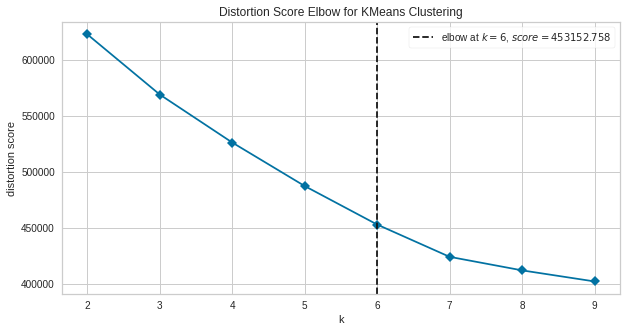

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [409]:
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10, 5) 

# Elbow Method 
X_scaled = data.values
model = KMeans() 
                                      #prendre entre 2 et 10 
visualizer = KElbowVisualizer(model, k=(2,10), timings= False)
visualizer.fit(X_scaled)    
visualizer.show()   

### Jeu de données complet

In [446]:
from sklearn.cluster import KMeans

X_scaled = data.values

KMeans_clustering = KMeans(n_clusters=6, n_init=10,random_state=42)
KMeans_clustering.fit(X_scaled) 
#y_kmeans = KMeans_clustering.predict(X_scaled)

KMeans(n_clusters=6, random_state=42)

In [411]:
from sklearn.decomposition import PCA
'''          
n_components: number of features as output (int)
        data: the data to transform (np.array)
kmeans_labels: the clusters's labels to the all data (np.array)
'''
def prepare_pca(n_components, data, kmeans_labels):
    names = ['x', 'y', 'z']
    matrix = PCA(n_components=n_components).fit_transform(data)
    df_matrix = pd.DataFrame(matrix)
    df_matrix.rename({i:names[i] for i in range(n_components)}, axis=1, inplace=True)
    df_matrix['labels'] = kmeans_labels 
    return df_matrix

<AxesSubplot:xlabel='y', ylabel='z'>

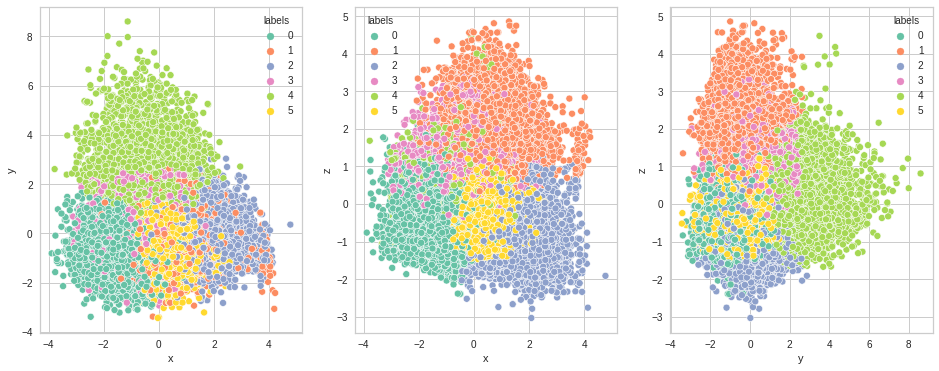

In [412]:
from sklearn.decomposition import PCA
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,6))

#itération 1 - random_state = 42
pca_df = prepare_pca(3, X_scaled, KMeans_clustering.labels_)

sns.scatterplot(x=pca_df.x, y=pca_df.y, hue=pca_df.labels, palette="Set2",ax=ax1)
sns.scatterplot(x=pca_df.x, y=pca_df.z, hue=pca_df.labels, palette="Set2",ax=ax2)
sns.scatterplot(x=pca_df.y, y=pca_df.z, hue=pca_df.labels, palette="Set2",ax=ax3)

In [413]:
pca_df.head()

,x,y,z,labels
0,-0.25,1.22,0.87,3
1,-0.86,-0.61,-0.30,0
2,-0.78,-0.14,-0.95,5
3,-0.20,0.30,1.34,1
4,0.49,-0.25,-0.23,5


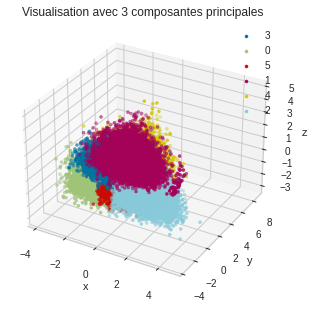

In [414]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#itération 1 - random_state = 42
xs = pca_df['x']
ys = pca_df['y']
zs = pca_df['z']

for s in pca_df['labels'].unique():
    ax.scatter(xs[pca_df.labels==s], ys[pca_df.labels==s], zs[pca_df.labels==s], s=10,label=s)
    
ax.legend()
ax.set_title('Visualisation avec 3 composantes principales')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

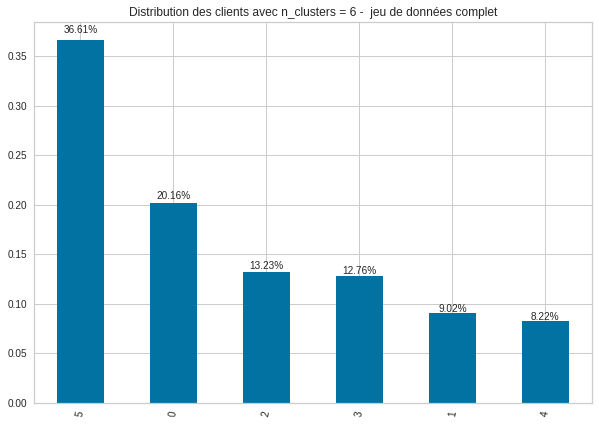

In [447]:
plt.rcParams['figure.figsize'] = (10, 7)

#iteration 1 random_state = 42
df_result = pd.DataFrame(KMeans_clustering.labels_,columns=['label'] ) 

ax = df_result["label"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=80)
plt.title("Distribution des clients avec n_clusters = 6 -  jeu de données complet")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')#{  :.0%} : annotate decimals

plt.show()

In [152]:
from matplotlib import pyplot
from numpy import unique
from numpy import where
from sklearn import metrics 
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# define the model
model = KMeans(n_clusters=6)

# fit model and predict clusters
yhat = model.fit(X_scaled)
yhat_2 = model.fit_predict(X_scaled)

# retrieve unique clusters
clusters = unique(yhat)

# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(X_scaled, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(X_scaled, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(X_scaled, yhat_2)


print("Scores pour l'itération 1:")
print("----------------------------------")
print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)
#time = 5 min

Scores pour l'itération 1:
----------------------------------
Silhouette Score: 0.1359
Calinski Harabasz Score: 8884.8511
Davies Bouldin Score: 1.8829


Le **coefficient silhouette** est compris entre -1 et 1, plus proche le coefficient est proche de 1, plus l'assignation de x à son cluster est satisfaisante.


silhouette_score=0,06 \
silhouette_score=0,08 avec la variable `payment_mean`. \
silhouette_score=0.126 , n_clusters = 12, sans les variables `payment_mean`, `product_weight_g` , `product_length_cm`, `product_height_cm`,  `product_width_cm`.

silhouette_score=0.119, n_clusters = 8, sans les variable ci-dessus.\
silhouette_score=0.126, n_clusters = 9, sans les variables ci-dessus.\
silhouette_score=0.127, avec eps= 3, n_clusters = 9, sans les variables `order_status_approved`,`order_status_invoiced`,`order_status_processing`,`order_status_shipped`,`order_status_unavailable`.\
silhouette_score=0.120, avec eps= 2.5, n_clusters = 7, sans les variables `order_status_approved`,`order_status_invoiced`,`order_status_processing`,`order_status_shipped`,`order_status_unavailable`.\
silhouette_score=0.136, avec eps= 1.5, n_clusters = 6, sans les variables `order_status_approved`,`order_status_invoiced`,`order_status_processing`,`order_status_shipped`,`order_status_unavailable`.




### Jeu de données 1

In [432]:
from sklearn.cluster import KMeans

X_scaled = data_set1.values
y_kmeans = KMeans_clustering.predict(X_scaled)

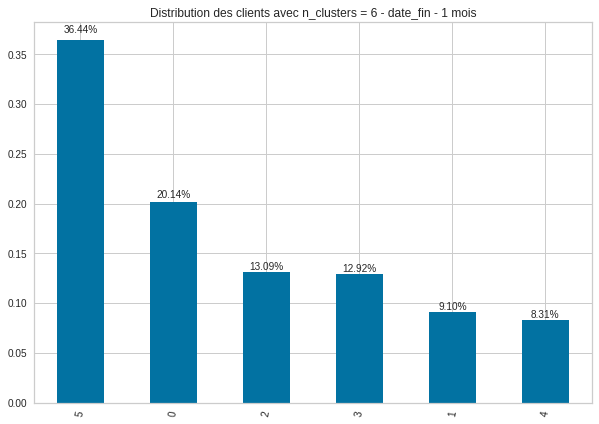

In [433]:
plt.rcParams['figure.figsize'] = (10, 7)

#iteration 1 random_state = 42  
df_result = pd.DataFrame(y_kmeans,columns=['label'] )  #(79300, 1)

ax = df_result["label"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=80)
plt.title("Distribution des clients avec n_clusters = 6 - date_fin - 1 mois")
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')#{  :.0%} : annotate decimals

plt.show()

### Jeu de données 2 

In [434]:
from sklearn.cluster import KMeans

X_scaled = data_set2.values
 
y_kmeans = KMeans_clustering.predict(X_scaled)

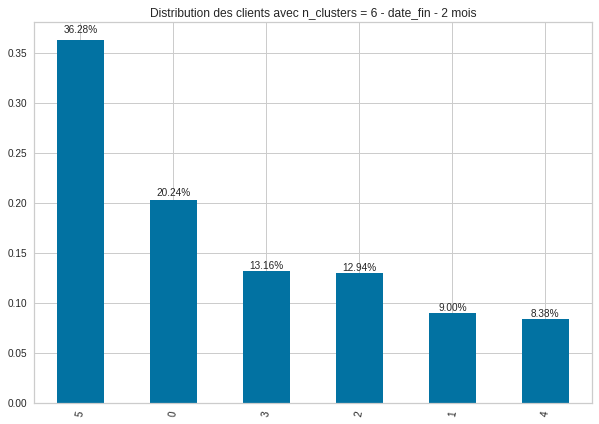

In [435]:
plt.rcParams['figure.figsize'] = (10, 7)

#iteration 1 random_state = 42  
df_result = pd.DataFrame(y_kmeans,columns=['label'] )  #(79300, 1)

ax = df_result["label"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=80)
plt.title("Distribution des clients avec n_clusters = 6 - date_fin - 2 mois")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')#{  :.0%} : annotate decimals

plt.show()

### Jeu de données 3

In [436]:
from sklearn.cluster import KMeans

X_scaled = data_set3.values

y_kmeans = KMeans_clustering.predict(X_scaled)

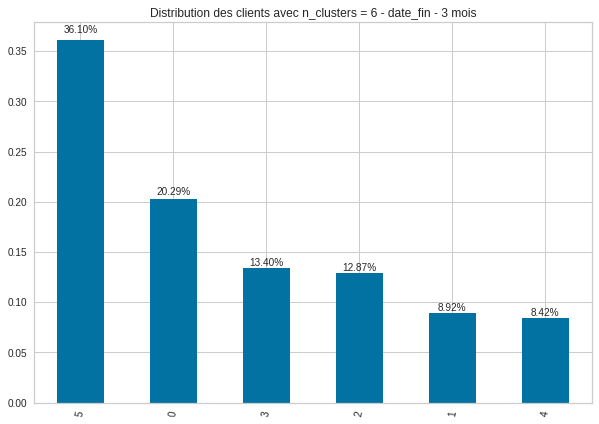

In [437]:
plt.rcParams['figure.figsize'] = (10, 7)

#iteration 1 random_state = 42  
df_result = pd.DataFrame(y_kmeans,columns=['label'] )  #(79300, 1)

ax = df_result["label"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=80)
plt.title("Distribution des clients avec n_clusters = 6 - date_fin - 3 mois")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')#{  :.0%} : annotate decimals

plt.show()

### Jeu de données 4

In [438]:
from sklearn.cluster import KMeans

X_scaled = data_set4.values

y_kmeans = KMeans_clustering.predict(X_scaled)

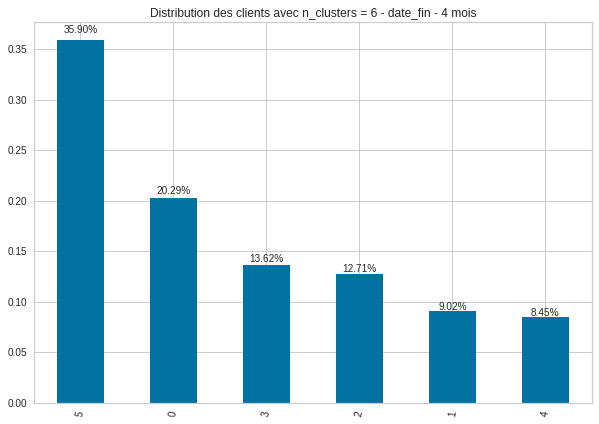

In [439]:
plt.rcParams['figure.figsize'] = (10, 7)

#iteration 1 random_state = 42  
df_result = pd.DataFrame(y_kmeans,columns=['label'] )  #(79300, 1)

ax = df_result["label"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=80)
plt.title("Distribution des clients avec n_clusters = 6 - date_fin - 4 mois")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')#{  :.0%} : annotate decimals

plt.show()

### Jeu de données 5

In [440]:
from sklearn.cluster import KMeans

X_scaled = data_set5.values

y_kmeans = KMeans_clustering.predict(X_scaled)

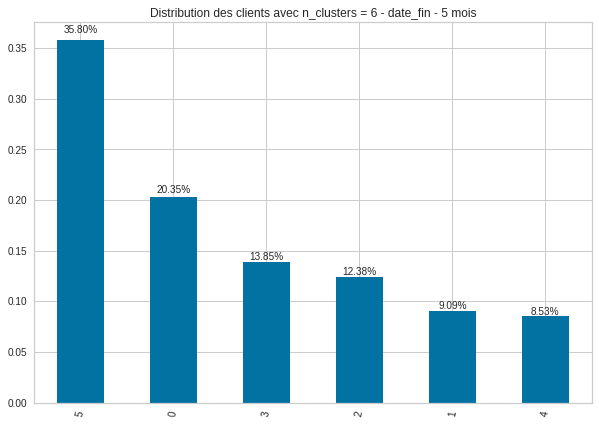

In [441]:
plt.rcParams['figure.figsize'] = (10, 7)

#iteration 1 random_state = 42  
df_result = pd.DataFrame(y_kmeans,columns=['label'] )  #(79300, 1)

ax = df_result["label"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=80)
plt.title("Distribution des clients avec n_clusters = 6 - date_fin - 5 mois")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')#{  :.0%} : annotate decimals

plt.show()

### Jeu de données 6

In [442]:
from sklearn.cluster import KMeans

X_scaled = data_set6.values

y_kmeans = KMeans_clustering.predict(X_scaled)

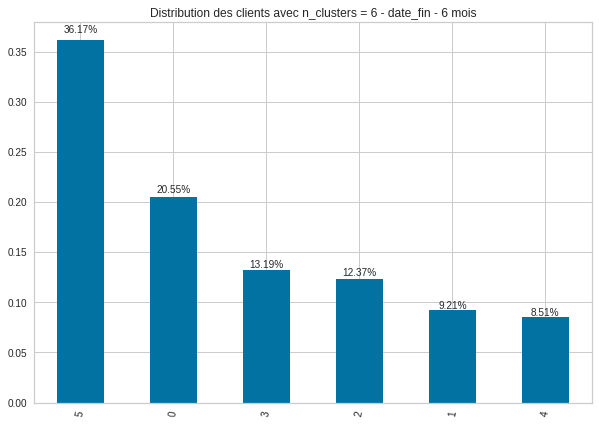

In [443]:
plt.rcParams['figure.figsize'] = (10, 7)

#iteration 1 random_state = 42  
df_result = pd.DataFrame(y_kmeans,columns=['label'] )  #(79300, 1)

ax = df_result["label"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=80)
plt.title("Distribution des clients avec n_clusters = 6 - date_fin - 6 mois")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')#{  :.0%} : annotate decimals

plt.show()

Comme les segments ne bougent pas beaucoup en 6 mois, testons en 12 mois:

### jeu de données 7

In [444]:
from sklearn.cluster import KMeans

X_scaled = data_set7.values

y_kmeans = KMeans_clustering.predict(X_scaled)

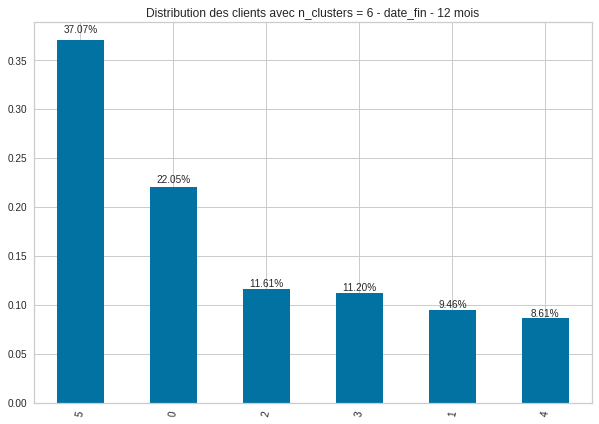

In [445]:
plt.rcParams['figure.figsize'] = (10, 7)

#iteration 1 random_state = 42  
df_result = pd.DataFrame(y_kmeans,columns=['label'] )  #(79300, 1)

ax = df_result["label"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=80)
plt.title("Distribution des clients avec n_clusters = 6 - date_fin - 12 mois")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')#{  :.0%} : annotate decimals

plt.show()

## <font color="#337da4">Clustering en 2 phases - random_state = 42</font>

Pour un grand nombre d'observations, le calcul d'un cluster hiérarchique peut prendre des heures et fait interrompre le kernel du jupyter notebook. 

On contourne le problème en utilisant le clustering à deux phases:
* **phase 1 : Kmeans avec 1000 clusters** 
* **phase 2 : AgglomerativeClustering ou clustering hierarchique avec ses 1000 centroïdes en entrée**

In [189]:
%matplotlib inline
import time
import pylab as pl
from IPython import display

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# plt.figure(figsize=(15, 20))
plt.rcParams['figure.figsize'] = [20,15]

In [190]:
data = pd.read_csv("7bis.csv")
data = data.set_index("order_purchase_timestamp")
print(data.shape)
data.head()

(86594, 22)


,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,,
2018-03-19 18:40:33,0.11,-5.33e-01,-0.09,-2.24,1.01,-0.45,-0.71,-0.32,-0.12,-0.92,-0.31,-1.19,0,1,0,1,0,0,0,0,0,1
2017-12-03 17:28:57,-0.06,9.42e-03,-0.09,0.69,-1.09,0.36,-0.71,-0.32,-0.15,-0.14,-0.20,0.29,0,1,0,1,0,0,1,0,0,0
2018-03-12 11:56:58,0.02,-6.84e-01,-0.09,0.69,-0.09,-0.70,-0.71,-0.32,-0.15,-0.97,-0.84,-0.30,0,1,0,1,0,0,0,0,1,0
2017-04-13 02:11:17,-0.46,1.08e-01,-0.09,-0.05,-0.29,0.33,-0.71,-0.32,-0.25,1.42,0.96,0.10,0,1,1,0,0,0,0,1,0,0
2017-03-05 19:25:45,1.14,-4.49e-01,-0.09,-0.05,0.31,0.67,-0.13,-0.32,0.14,-0.41,-0.42,0.10,0,1,0,1,0,0,0,0,0,1


### Kmeans

In [191]:
'''Si une valeur fixe est affectée comme random_state = 0 ou 1 ou 42 
ou tout autre entier, peu importe le nombre de fois que vous exécutez votre code,
le résultat sera le même.'''

X_scaled = data.values

#Apprentissage - modelisation
K_clustering = KMeans(n_clusters=1000, random_state=42)
K_clustering.fit(X_scaled)
#Calcul définitif des centroïdes
centers = K_clustering.cluster_centers_ #centers(1000, 22)
#time = 17 min

In [192]:
#save the centers results
np.savetxt('centers1.csv', centers, delimiter=",")
centers_df = pd.read_csv("centers1.csv", header = None)
centers_df.columns = data.columns
print(centers_df.shape)
centers_df.head()

(1000, 22)


,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night
0,-0.18,-3.22e-01,-0.09,0.44,-0.61,-0.02,1.81,-0.07,-0.12,-0.46,1.52,-1.48,0.00e+00,1.0,2.78e-17,1.00,0.00e+00,3.47e-18,5.26e-02,0.0,1.75e-02,9.30e-01
1,-0.08,-2.70e-03,-0.09,0.51,-0.49,0.47,-0.55,-0.21,-0.12,0.70,0.02,-0.04,0.00e+00,1.0,2.78e-17,0.96,9.80e-03,2.94e-02,1.00e+00,0.0,0.00e+00,-5.55e-17
2,-0.30,-5.02e-01,-0.09,0.51,0.77,-0.43,0.78,-0.26,-0.21,-0.73,0.78,-0.22,-6.51e-19,1.0,-2.78e-17,1.00,-1.73e-18,0.00e+00,-5.55e-17,0.0,1.00e+00,0.00e+00
3,-0.23,-2.92e-01,-0.09,-0.05,0.72,-0.40,-0.53,-0.31,-0.20,-0.41,-0.64,0.65,0.00e+00,1.0,0.00e+00,1.00,1.73e-18,0.00e+00,1.00e+00,0.0,5.55e-17,5.55e-17
4,0.57,-2.36e-01,-0.09,0.56,-1.13,-0.54,-0.62,-0.28,0.02,-0.51,-0.40,0.36,-4.34e-19,1.0,2.78e-17,0.99,8.00e-03,3.47e-18,0.00e+00,0.0,0.00e+00,1.00e+00


#### Préparation des jeux de données pour l'AgglomerativeClustering

In [193]:
centers_mapping = {case: cluster for case, cluster in enumerate(K_clustering.labels_)} #(86594,)

In [194]:
X_scaled = data_set1.values
y_kmeans = K_clustering.predict(X_scaled) # == K_clustering.labels_
centers_mapping1 = {case: cluster for case, cluster in enumerate(y_kmeans)} #(80351,)

In [195]:
X_scaled = data_set2.values
y_kmeans = K_clustering.predict(X_scaled) # == K_clustering.labels_
centers_mapping2 = {case: cluster for case, cluster in enumerate(y_kmeans)} #(75304,)

In [196]:
X_scaled = data_set3.values
y_kmeans = K_clustering.predict(X_scaled) # == K_clustering.labels_
centers_mapping3 = {case: cluster for case, cluster in enumerate(y_kmeans)} #(69724,)

In [197]:
X_scaled = data_set4.values
y_kmeans = K_clustering.predict(X_scaled) # == K_clustering.labels_
centers_mapping4 = {case: cluster for case, cluster in enumerate(y_kmeans)} #(63646,)

In [198]:
X_scaled = data_set5.values
y_kmeans = K_clustering.predict(X_scaled) # == K_clustering.labels_
centers_mapping5 = {case: cluster for case, cluster in enumerate(y_kmeans)} #(57430,)

In [199]:
X_scaled = data_set6.values
y_kmeans = K_clustering.predict(X_scaled) # == K_clustering.labels_
centers_mapping6 = {case: cluster for case, cluster in enumerate(y_kmeans)} #(51510,)

In [200]:
X_scaled = data_set7.values
y_kmeans = K_clustering.predict(X_scaled) # == K_clustering.labels_
centers_mapping7 = {case: cluster for case, cluster in enumerate(y_kmeans)} #(19712,)

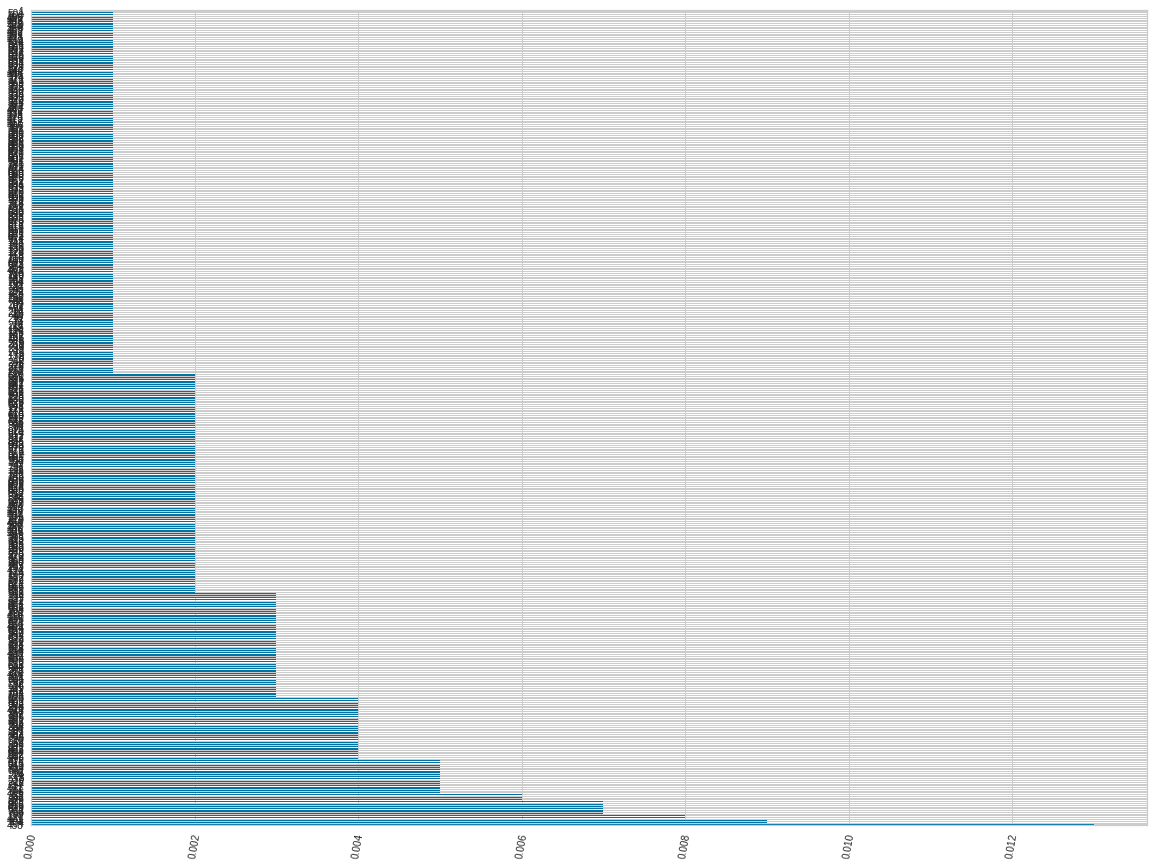

In [209]:
#iteration 1 - random_state = 42
#1000 centroïdes Distribution 

#put v in list
list_labels = [v for k,v in centers_mapping.items()]

df_result = pd.DataFrame(list_labels,columns=['label'] ) 

ax = df_result["label"].iloc[:1000].value_counts(normalize=True).plot(kind='barh')
plt.xticks(rotation=80)


plt.show()

### AgglomerativeClustering

**<font color="green">On récupère les coordoonnées des centroïdes avec centers (1000, ) pour l'AgglomerativeClustering.</font>**

L' **AgglomerativeClustering** se fait en 3 étapes :
- Calcul du nombre de clusters par la méthode du **dendogramme et du coude** 
- Entrainement du modèle avec le bon nombre de clusters
- Plot des clusters avec la PCA

<Figure size 720x504 with 0 Axes>

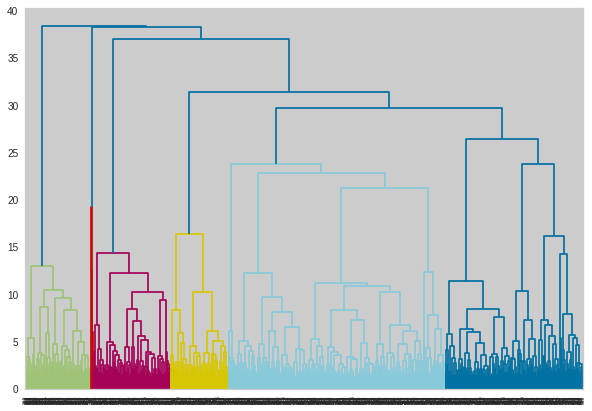

<Figure size 720x504 with 0 Axes>

In [421]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy

Z = linkage(centers, 'ward')
dn = hierarchy.dendrogram(Z)
plt.figure()

Nous cherchons la plus grande distance verticale sans croiser aucune ligne horizontale.

Comptons le nombre de lignes sur le diagramme soit 7.

Et déterminons le nombre optimal de clusters **n_clusters=7**. 

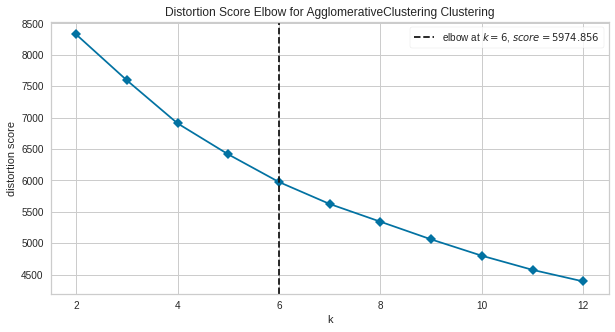

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [423]:
plt.rcParams['figure.figsize'] = (10, 5) 
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

# Elbow Method for Heirarchical Clustering

#Reset the model
model = AgglomerativeClustering()

visualizer = KElbowVisualizer(model, k=(2,13), timings= False)
visualizer.fit(centers)    
visualizer.show()   
#distortion, which computes the sum of squared distances from each point to its assigned center

In [424]:
from sklearn.cluster import AgglomerativeClustering
                                                             #default=’euclidean’   #default=’ward’
Hclustering = AgglomerativeClustering(n_clusters=6, affinity= "euclidean", linkage= 'ward') 
Hclustering.fit(centers) #centers(1000,22)
#time OK fast

AgglomerativeClustering(n_clusters=6)

In [247]:
print("Classifying the points into clusters:")
print(Hclustering.labels_) 

Classifying the points into clusters:
[1 2 0 2 2 4 1 3 0 0 0 4 2 2 2 1 4 2 0 2 2 2 2 3 2 2 2 0 0 0 4 1 2 3 3 0 2
 2 1 3 5 2 0 1 2 2 3 1 2 0 2 2 1 4 3 1 0 2 4 0 4 5 2 2 4 4 5 0 1 2 2 1 2 3
 2 1 2 4 1 0 0 0 2 1 0 0 0 2 0 2 1 2 2 0 2 0 2 4 2 1 4 2 3 2 0 0 3 0 0 0 0
 2 3 0 4 0 1 2 0 2 2 2 2 3 4 4 2 2 2 0 1 4 0 4 4 0 2 4 3 2 4 0 2 0 1 2 2 0
 1 2 0 2 0 3 0 2 2 3 0 0 2 3 0 3 0 2 2 3 4 0 3 4 0 2 2 2 4 1 2 2 2 3 1 2 4
 2 4 2 2 2 0 2 4 0 0 2 0 0 2 1 0 2 2 0 4 3 0 0 2 3 3 4 3 2 3 2 0 2 0 2 1 2
 4 2 0 2 2 0 0 0 2 3 0 0 4 4 4 2 2 2 1 4 5 3 2 2 4 2 0 0 0 3 2 2 1 3 2 3 2
 2 3 3 3 2 4 2 2 2 2 2 2 2 0 2 1 4 1 1 0 2 2 0 4 2 3 2 4 2 4 0 3 0 0 0 0 2
 2 1 2 2 2 0 1 2 2 0 2 0 4 2 4 4 0 0 2 4 4 2 2 0 3 0 0 2 0 3 3 2 4 3 2 4 4
 2 2 4 4 1 2 2 3 0 3 0 4 2 2 4 0 1 1 2 2 2 2 2 3 2 2 0 2 0 4 2 2 2 4 2 0 1
 4 1 2 4 2 0 4 1 0 0 2 4 3 3 4 2 0 2 1 4 2 2 2 4 0 2 4 4 0 2 2 2 2 2 2 1 1
 3 3 2 3 4 1 1 4 2 2 0 0 0 2 2 2 2 0 0 2 1 2 4 2 4 2 3 2 4 2 0 3 0 2 2 2 2
 0 2 3 2 0 1 2 4 0 2 2 0 2 2 2 0 2 1 2 2 0 3 2 0 0 2 2 2 0 3 4

#### Préparation des jeux de données pour la distribution finale

In [425]:
#dict H_mapping(1000,)
H_mapping = {case:cluster for case, cluster in enumerate(Hclustering.labels_)}
#dict final_mapping(86594, )                     
final_mapping = {case:H_mapping[centers_mapping[case]] for case in centers_mapping}

In [249]:
#dict H_mapping(1000,)
H_mapping = {case:cluster for case, cluster in enumerate(Hclustering.labels_)}
#dict final_mapping(80351, )                      
final_mapping1 = {case:H_mapping[centers_mapping1[case]] for case in centers_mapping1}

In [250]:
#dict H_mapping(1000,)
H_mapping = {case:cluster for case, cluster in enumerate(Hclustering.labels_)}
#dict final_mapping(75304, )                       
final_mapping2 = {case:H_mapping[centers_mapping2[case]] for case in centers_mapping2}

In [251]:
#dict H_mapping(1000,)
H_mapping = {case:cluster for case, cluster in enumerate(Hclustering.labels_)}
#dict final_mapping(69724, )                        
final_mapping3 = {case:H_mapping[centers_mapping3[case]] for case in centers_mapping3}

In [252]:
#dict H_mapping(1000,)
H_mapping = {case:cluster for case, cluster in enumerate(Hclustering.labels_)}
#dict final_mapping(63646, )                        
final_mapping4 = {case:H_mapping[centers_mapping4[case]] for case in centers_mapping4}

In [253]:
#dict H_mapping(1000,)
H_mapping = {case:cluster for case, cluster in enumerate(Hclustering.labels_)}
#dict final_mapping(57430, )                      
final_mapping5 = {case:H_mapping[centers_mapping5[case]] for case in centers_mapping5}

In [254]:
#dict H_mapping(1000,)
H_mapping = {case:cluster for case, cluster in enumerate(Hclustering.labels_)}
#dict final_mapping(51510, )                        
final_mapping6 = {case:H_mapping[centers_mapping6[case]] for case in centers_mapping6}

In [255]:
#dict H_mapping(1000,)
H_mapping = {case:cluster for case, cluster in enumerate(Hclustering.labels_)}
#dict final_mapping(19712, )                         
final_mapping7 = {case:H_mapping[centers_mapping7[case]] for case in centers_mapping7}

#### Jeu de données complet

<AxesSubplot:xlabel='y', ylabel='z'>

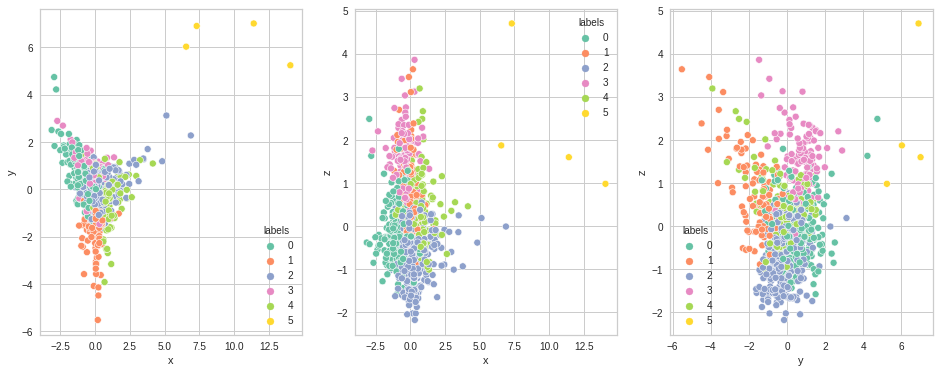

In [426]:
#Plot AgglomerativeClustering(n_clusters=6)
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,6))

pca_df = prepare_pca(3, centers, Hclustering.labels_) #pca_df(1000, 4)

sns.scatterplot(x=pca_df.x, y=pca_df.y, hue=pca_df.labels, palette="Set2",ax=ax1)
sns.scatterplot(x=pca_df.x, y=pca_df.z, hue=pca_df.labels, palette="Set2",ax=ax2)
sns.scatterplot(x=pca_df.y, y=pca_df.z, hue=pca_df.labels, palette="Set2",ax=ax3)

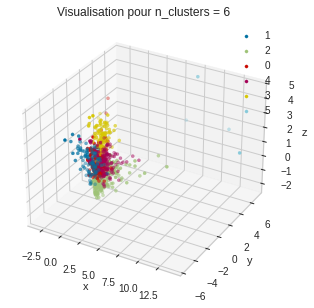

In [427]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = pca_df['x']
ys = pca_df['y']
zs = pca_df['z']

for s in pca_df['labels'].unique():
    ax.scatter(xs[pca_df.labels==s], ys[pca_df.labels==s], zs[pca_df.labels==s], s=10,label=s)
    
ax.legend()
ax.set_title('Visualisation pour n_clusters = 6')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

**<font color="green">On passe donc de 1000 clusters à 6 clusters.</font>**

**Vérification du nombre de centroïdes dans chaque clusters**

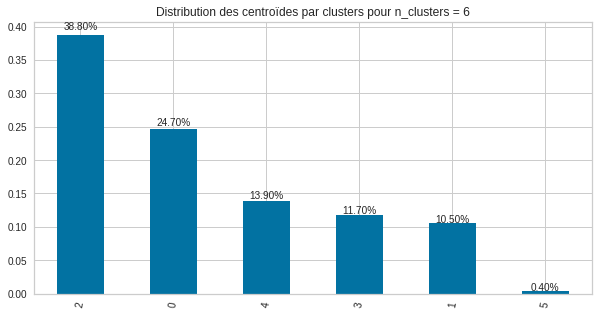

In [428]:
# eps = 1.5

#put v in list
list_labels = [v for k,v in H_mapping.items()] #(1000, )
df_result = pd.DataFrame(list_labels,columns=['label'] ) 

ax = df_result["label"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=80)
plt.title("Distribution des centroïdes par clusters pour n_clusters = 6")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')

plt.show()

**Vérification du nombre de clients dans chaque clusters**

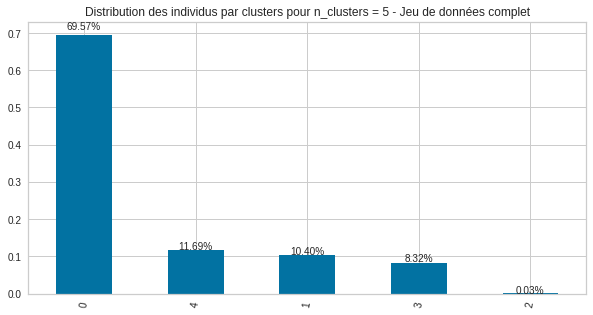

In [274]:
# eps = 1.5

#put v in list
list_labels = [v for k,v in final_mapping.items()] #(86613, )
df_result = pd.DataFrame(list_labels,columns=['label'] ) 

ax = df_result["label"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=80)
plt.title("Distribution des individus par clusters pour n_clusters = 5 - Jeu de données complet")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')

plt.show()


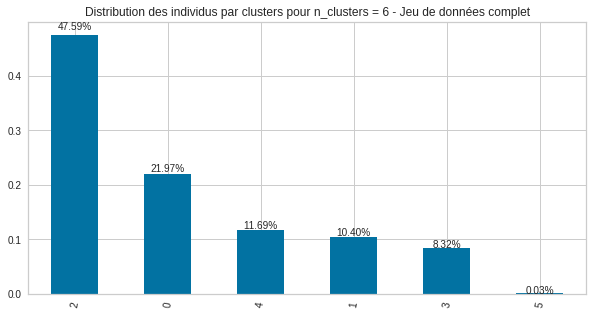

In [429]:
# eps = 1.5

#put v in list
list_labels = [v for k,v in final_mapping.items()] #(86613, )
df_result = pd.DataFrame(list_labels,columns=['label'] ) 

ax = df_result["label"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=80)
plt.title("Distribution des individus par clusters pour n_clusters = 6 - Jeu de données complet")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')

plt.show()


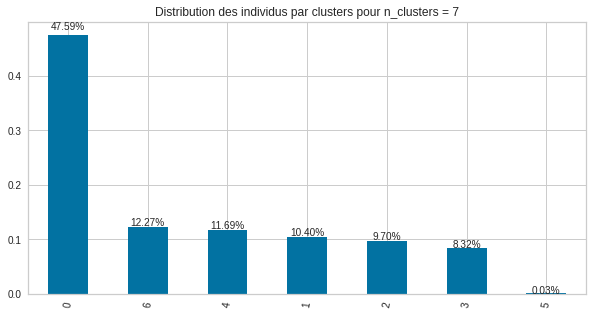

In [277]:
# eps = 1.5 

#put v in list
list_labels = [v for k,v in final_mapping.items()]
df_result = pd.DataFrame(list_labels,columns=['label'] ) #(86594, 1)

ax = df_result["label"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=80)
plt.title("Distribution des individus par clusters pour n_clusters = 7")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')

plt.show()

**<font color="green">Au vue des répartitions des individus ci-dessus, n_clusters = 6.</font>**

In [430]:
from numpy import unique
from numpy import where

from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from matplotlib import pyplot

#scoring avec le jeu de données complet

model = AgglomerativeClustering(n_clusters=6)
yhat = model.fit(centers)
yhat_2 = model.fit_predict(centers)

# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(centers, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(centers, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(centers, yhat_2)

print("Scores pour l'itération 1:")
print("----------------------------------")
print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Scores pour l'itération 1:
----------------------------------
Silhouette Score: 0.1271
Calinski Harabasz Score: 102.7091
Davies Bouldin Score: 1.9166


Le **coefficient silhouette** est donc compris entre -1 et 1, plus proche le coefficient est proche de 1, plus l'assignation de x à son cluster est satisfaisante.

Le ratio **Calinski Harabasz** aussi sous le nom de **Variance Ratio Criterion** mesure le ratio entre la dispersion intra cluster sur la dispersion inter cluster. Donc plus ce ratio est petit, plus les groupes sont séparés et regroupés. 

Le **ratio de Davies-Boudin** est d'autant plus faible que tous les clusters 
- sont homogènes - within-cluster distances (le numérateur de cette fraction est petit) et que tous 
- sont bien séparés - between-cluster distances. (le dénominateur est grand).  

Donc plus ce ratio est petit, plus les groupes sont séparés et regroupés.

#### Jeu de données 1

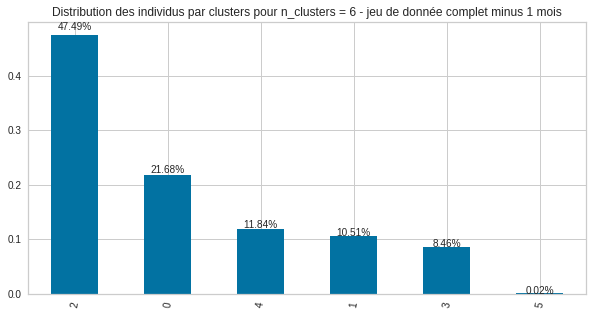

In [263]:
# eps = 1.5

#put v in list
list_labels = [v for k,v in final_mapping1.items()] #(86613, )
df_result = pd.DataFrame(list_labels,columns=['label'] ) 

ax = df_result["label"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=80)
plt.title("Distribution des individus par clusters pour n_clusters = 6 - jeu de donnée complet minus 1 mois")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')

plt.show()

#### Jeu de données 2

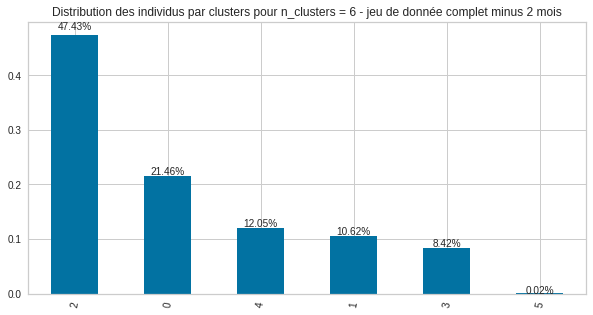

In [264]:
# iteration2, eps = 1.5

#put v in list
list_labels = [v for k,v in final_mapping2.items()]
df_result = pd.DataFrame(list_labels,columns=['label'] ) 

ax = df_result["label"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=80)
plt.title("Distribution des individus par clusters pour n_clusters = 6 - jeu de donnée complet minus 2 mois")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')

plt.show()

#### Jeu de données 3

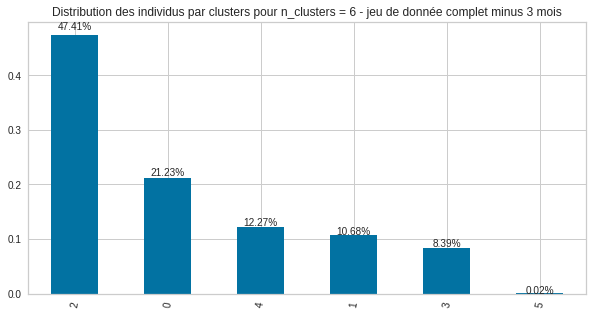

In [265]:
# iteration2, eps = 1.5

#put v in list
list_labels = [v for k,v in final_mapping3.items()]
df_result = pd.DataFrame(list_labels,columns=['label'] ) 

ax = df_result["label"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=80)
plt.title("Distribution des individus par clusters pour n_clusters = 6 - jeu de donnée complet minus 3 mois")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')

plt.show()

#### Jeu de données 4

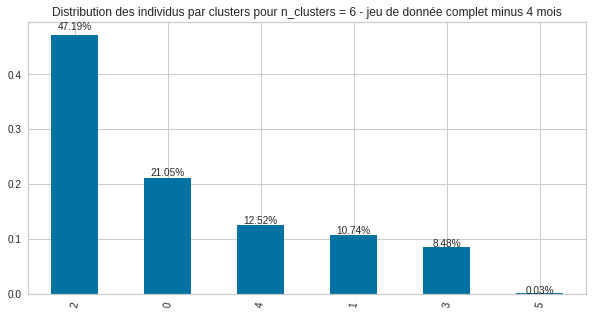

In [266]:
# iteration2, eps = 1.5

#put v in list
list_labels = [v for k,v in final_mapping4.items()]
df_result = pd.DataFrame(list_labels,columns=['label'] ) 

ax = df_result["label"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=80)
plt.title("Distribution des individus par clusters pour n_clusters = 6 - jeu de donnée complet minus 4 mois")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')

plt.show()

#### Jeu de données 5

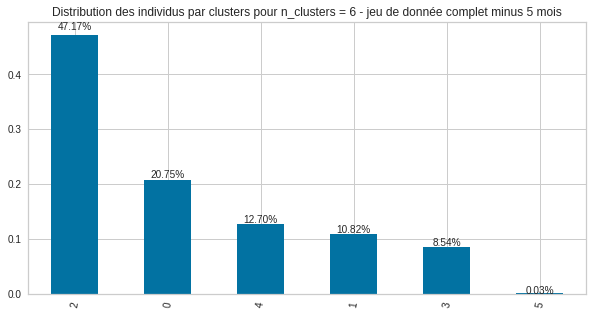

In [267]:
# iteration2, eps = 1.5

#put v in list
list_labels = [v for k,v in final_mapping5.items()]
df_result = pd.DataFrame(list_labels,columns=['label'] ) 

ax = df_result["label"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=80)
plt.title("Distribution des individus par clusters pour n_clusters = 6 - jeu de donnée complet minus 5 mois")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')

plt.show()

#### Jeu de données 6

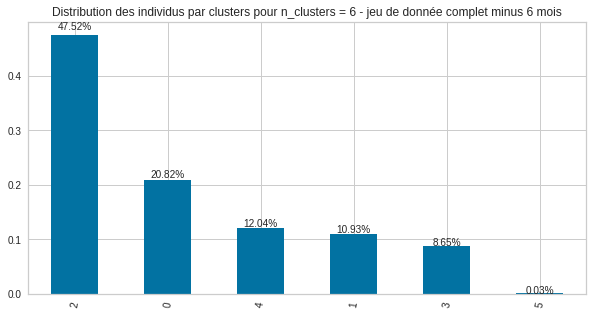

In [268]:
# iteration2, eps = 1.5

#put v in list
list_labels = [v for k,v in final_mapping6.items()]
df_result = pd.DataFrame(list_labels,columns=['label'] ) 

ax = df_result["label"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=80)
plt.title("Distribution des individus par clusters pour n_clusters = 6 - jeu de donnée complet minus 6 mois")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')

plt.show()

#### Jeu de données 7

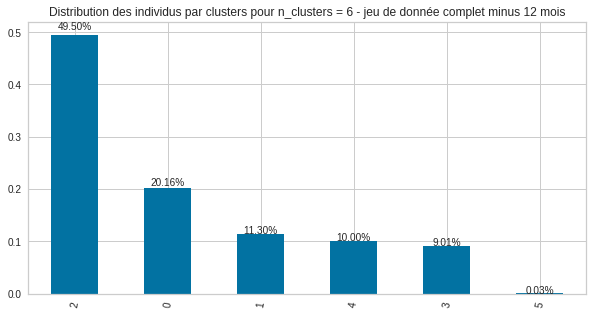

In [269]:
# iteration2, eps = 1.5

#put v in list
list_labels = [v for k,v in final_mapping7.items()]
df_result = pd.DataFrame(list_labels,columns=['label'] ) 

ax = df_result["label"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=80)
plt.title("Distribution des individus par clusters pour n_clusters = 6 - jeu de donnée complet minus 12 mois")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center')

plt.show()

# <font color="#1d479b">Ajout de la colonne cluster</font>

## <font color="#337da4">Sur le dataframe normalisé</font>

In [43]:
data = pd.read_csv("7.csv")
data = data.set_index("customer_unique_id")
print(data.shape)
data.head()

(86613, 22)


,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,
639d23421f5517f69d0c3d6e6564cf0e,0.11,-5.33e-01,-0.09,-2.24,1.01,-0.45,-0.71,-0.32,-0.12,-0.92,-0.31,-1.19,0,1,0,1,0,0,0,0,0,1
742405ae9634962bb67f54214a8247c9,-0.06,9.42e-03,-0.09,0.69,-1.09,0.36,-0.71,-0.32,-0.15,-0.14,-0.20,0.29,0,1,0,1,0,0,1,0,0,0
b813fe59b2d10fb59d5594ec8f91750e,0.02,-6.84e-01,-0.09,0.69,-0.09,-0.70,-0.71,-0.32,-0.15,-0.97,-0.84,-0.30,0,1,0,1,0,0,0,0,1,0
c76c0ebec1c44b44dca88e42b23149f1,-0.46,1.08e-01,-0.09,-0.05,-0.29,0.33,-0.71,-0.32,-0.25,1.42,0.96,0.10,0,1,1,0,0,0,0,1,0,0
c4750b080e135d87328222826982fe39,1.14,-4.49e-01,-0.09,-0.05,0.31,0.67,-0.13,-0.32,0.14,-0.41,-0.42,0.10,0,1,0,1,0,0,0,0,0,1


In [44]:
#Récupération des clusters
cluster = []
for k,v in final_mapping.items():
    cluster.append(v)
    #print(v)
    
data["cluster"]=cluster
data["cluster"].nunique()
data["cluster"].unique()

array([4, 2, 0, 5, 3, 1])

In [45]:
#save and read df
data.to_csv("8.csv",index=True)
data = pd.read_csv("8.csv", index_col="customer_unique_id")
#data = data_unscaled.set_index("customer_unique_id")
print(data.shape)
data.head()

(86613, 23)


,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night,cluster
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,
639d23421f5517f69d0c3d6e6564cf0e,0.11,-5.33e-01,-0.09,-2.24,1.01,-0.45,-0.71,-0.32,-0.12,-0.92,-0.31,-1.19,0,1,0,1,0,0,0,0,0,1,4
742405ae9634962bb67f54214a8247c9,-0.06,9.42e-03,-0.09,0.69,-1.09,0.36,-0.71,-0.32,-0.15,-0.14,-0.20,0.29,0,1,0,1,0,0,1,0,0,0,2
b813fe59b2d10fb59d5594ec8f91750e,0.02,-6.84e-01,-0.09,0.69,-0.09,-0.70,-0.71,-0.32,-0.15,-0.97,-0.84,-0.30,0,1,0,1,0,0,0,0,1,0,2
c76c0ebec1c44b44dca88e42b23149f1,-0.46,1.08e-01,-0.09,-0.05,-0.29,0.33,-0.71,-0.32,-0.25,1.42,0.96,0.10,0,1,1,0,0,0,0,1,0,0,2
c4750b080e135d87328222826982fe39,1.14,-4.49e-01,-0.09,-0.05,0.31,0.67,-0.13,-0.32,0.14,-0.41,-0.42,0.10,0,1,0,1,0,0,0,0,0,1,0


## <font color="#337da4">Sur le dataframe avant normalisation</font>

In [46]:
#Data before normalisation
data_unscaled = pd.read_csv("3.csv", index_col = "customer_unique_id")
data_unscaled = data_unscaled.dropna(axis='rows')   

#Types
list_column2 = ["customer_zip_code_prefix",'seller_zip_code_prefix']
data_unscaled[list_column2] = data_unscaled[list_column2].astype('object')

#drop unuseful columns
list_column = [ "product_category_name",
               "product_category_name_english",
               'order_id',
               "product_id",
               "payment_type", #car comme most_payment_type
               "customer_zip_code_prefix",
               "customer_city",
               "customer_state",
              "seller_zip_code_prefix",
              "seller_city",
              "seller_state"]

for col in list_column:
    data_unscaled = data_unscaled.drop(labels=[col], axis=1)
    
data_unscaled.head()

,price,freight_value,payment_sequential,review_score,order_status,product_name_lenght,product_description_lenght,product_photos_qty,most_payment_type,order_count,payment_total,part_day,distances_km,diff_days_to_deliver,diff_days_estimated-delivered
customer_unique_id,,,,,,,,,,,,,,,
639d23421f5517f69d0c3d6e6564cf0e,145.95,11.65,1.0,1,delivered,59.0,493.0,1.0,credit_card,1,157.60,night,52.44,9.0,-1.0
742405ae9634962bb67f54214a8247c9,113.00,20.28,1.0,5,delivered,38.0,1018.0,1.0,credit_card,1,133.28,afternoon,515.11,10.0,14.0
b813fe59b2d10fb59d5594ec8f91750e,128.90,9.26,1.0,5,delivered,48.0,333.0,1.0,credit_card,1,138.16,morning,22.86,4.0,8.0
c76c0ebec1c44b44dca88e42b23149f1,36.85,21.85,1.0,4,delivered,46.0,1001.0,1.0,boleto,1,58.70,late_nignt,1447.41,21.0,12.0
c4750b080e135d87328222826982fe39,339.99,12.99,1.0,4,delivered,52.0,1222.0,2.0,credit_card,1,352.98,night,357.70,8.0,12.0


In [47]:
#outlier recovery
data_dbscan = pd.read_csv("6.csv", index_col = "customer_unique_id")
print(data_dbscan.shape)
data_dbscan.head()

(98562, 23)


,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night,dbscan_cluster
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,
639d23421f5517f69d0c3d6e6564cf0e,0.11,-5.33e-01,-0.09,-2.24,1.01,-0.45,-0.71,-0.32,-0.12,-0.92,-0.31,-1.19,0,1,0,1,0,0,0,0,0,1,0
742405ae9634962bb67f54214a8247c9,-0.06,9.42e-03,-0.09,0.69,-1.09,0.36,-0.71,-0.32,-0.15,-0.14,-0.20,0.29,0,1,0,1,0,0,1,0,0,0,0
b813fe59b2d10fb59d5594ec8f91750e,0.02,-6.84e-01,-0.09,0.69,-0.09,-0.70,-0.71,-0.32,-0.15,-0.97,-0.84,-0.30,0,1,0,1,0,0,0,0,1,0,0
c76c0ebec1c44b44dca88e42b23149f1,-0.46,1.08e-01,-0.09,-0.05,-0.29,0.33,-0.71,-0.32,-0.25,1.42,0.96,0.10,0,1,1,0,0,0,0,1,0,0,0
c4750b080e135d87328222826982fe39,1.14,-4.49e-01,-0.09,-0.05,0.31,0.67,-0.13,-0.32,0.14,-0.41,-0.42,0.10,0,1,0,1,0,0,0,0,0,1,0


In [48]:
#add the last column
data_unscaled["dbscan_cluster"] = data_dbscan["dbscan_cluster"]

In [49]:
data_unscaled.head()

,price,freight_value,payment_sequential,review_score,order_status,product_name_lenght,product_description_lenght,product_photos_qty,most_payment_type,order_count,payment_total,part_day,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,dbscan_cluster
customer_unique_id,,,,,,,,,,,,,,,,
639d23421f5517f69d0c3d6e6564cf0e,145.95,11.65,1.0,1,delivered,59.0,493.0,1.0,credit_card,1,157.60,night,52.44,9.0,-1.0,0
742405ae9634962bb67f54214a8247c9,113.00,20.28,1.0,5,delivered,38.0,1018.0,1.0,credit_card,1,133.28,afternoon,515.11,10.0,14.0,0
b813fe59b2d10fb59d5594ec8f91750e,128.90,9.26,1.0,5,delivered,48.0,333.0,1.0,credit_card,1,138.16,morning,22.86,4.0,8.0,0
c76c0ebec1c44b44dca88e42b23149f1,36.85,21.85,1.0,4,delivered,46.0,1001.0,1.0,boleto,1,58.70,late_nignt,1447.41,21.0,12.0,0
c4750b080e135d87328222826982fe39,339.99,12.99,1.0,4,delivered,52.0,1222.0,2.0,credit_card,1,352.98,night,357.70,8.0,12.0,0


In [50]:
#Drop outliers to the data
data_unscaled = data_unscaled[data_unscaled['dbscan_cluster'] != -1]
data_unscaled.drop(labels=['dbscan_cluster'], axis=1,inplace = True)
data_unscaled.shape #(97915, 27)

(86613, 15)

In [51]:
#Add the cluster colomns with 6 clusters
data_unscaled["cluster"]=cluster
data_unscaled.head()

,price,freight_value,payment_sequential,review_score,order_status,product_name_lenght,product_description_lenght,product_photos_qty,most_payment_type,order_count,payment_total,part_day,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,cluster
customer_unique_id,,,,,,,,,,,,,,,,
639d23421f5517f69d0c3d6e6564cf0e,145.95,11.65,1.0,1,delivered,59.0,493.0,1.0,credit_card,1,157.60,night,52.44,9.0,-1.0,4
742405ae9634962bb67f54214a8247c9,113.00,20.28,1.0,5,delivered,38.0,1018.0,1.0,credit_card,1,133.28,afternoon,515.11,10.0,14.0,2
b813fe59b2d10fb59d5594ec8f91750e,128.90,9.26,1.0,5,delivered,48.0,333.0,1.0,credit_card,1,138.16,morning,22.86,4.0,8.0,2
c76c0ebec1c44b44dca88e42b23149f1,36.85,21.85,1.0,4,delivered,46.0,1001.0,1.0,boleto,1,58.70,late_nignt,1447.41,21.0,12.0,2
c4750b080e135d87328222826982fe39,339.99,12.99,1.0,4,delivered,52.0,1222.0,2.0,credit_card,1,352.98,night,357.70,8.0,12.0,0


In [52]:
#Add the cluster colomns with 6 clusters
data_unscaled["cluster"]=data["cluster"]
#data_unscaled.head()

In [53]:
#save and read df
data_unscaled.to_csv("9.csv",index=True)
data_unscaled = pd.read_csv("9.csv", index_col = "customer_unique_id")
print(data_unscaled.shape)
data_unscaled.head()

(86613, 16)


,price,freight_value,payment_sequential,review_score,order_status,product_name_lenght,product_description_lenght,product_photos_qty,most_payment_type,order_count,payment_total,part_day,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,cluster
customer_unique_id,,,,,,,,,,,,,,,,
639d23421f5517f69d0c3d6e6564cf0e,145.95,11.65,1.0,1,delivered,59.0,493.0,1.0,credit_card,1,157.60,night,52.44,9.0,-1.0,4
742405ae9634962bb67f54214a8247c9,113.00,20.28,1.0,5,delivered,38.0,1018.0,1.0,credit_card,1,133.28,afternoon,515.11,10.0,14.0,2
b813fe59b2d10fb59d5594ec8f91750e,128.90,9.26,1.0,5,delivered,48.0,333.0,1.0,credit_card,1,138.16,morning,22.86,4.0,8.0,2
c76c0ebec1c44b44dca88e42b23149f1,36.85,21.85,1.0,4,delivered,46.0,1001.0,1.0,boleto,1,58.70,late_nignt,1447.41,21.0,12.0,2
c4750b080e135d87328222826982fe39,339.99,12.99,1.0,4,delivered,52.0,1222.0,2.0,credit_card,1,352.98,night,357.70,8.0,12.0,0


# <font color="#1d479b">Interprétation</font>

## <font color="#337da4">Régression logistique multi-classes avec pénalisation l1</font>

In [54]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
import time
import pylab as pl
from IPython import display
#pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.precision = 2
plt.rcParams['figure.figsize'] = (10, 5) #(L,l)
pd.set_option('display.max_columns', 50)

In [55]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [56]:
data = pd.read_csv("8.csv", index_col="customer_unique_id")
print(data.shape)
data.head()

(86613, 23)


,price,freight_value,payment_sequential,review_score,product_name_lenght,product_description_lenght,product_photos_qty,order_count,payment_total,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,order_status_canceled,order_status_delivered,most_payment_type_boleto,most_payment_type_credit_card,most_payment_type_debit_card,most_payment_type_voucher,part_day_afternoon,part_day_late_nignt,part_day_morning,part_day_night,cluster
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,
639d23421f5517f69d0c3d6e6564cf0e,0.11,-5.33e-01,-0.09,-2.24,1.01,-0.45,-0.71,-0.32,-0.12,-0.92,-0.31,-1.19,0,1,0,1,0,0,0,0,0,1,4
742405ae9634962bb67f54214a8247c9,-0.06,9.42e-03,-0.09,0.69,-1.09,0.36,-0.71,-0.32,-0.15,-0.14,-0.20,0.29,0,1,0,1,0,0,1,0,0,0,2
b813fe59b2d10fb59d5594ec8f91750e,0.02,-6.84e-01,-0.09,0.69,-0.09,-0.70,-0.71,-0.32,-0.15,-0.97,-0.84,-0.30,0,1,0,1,0,0,0,0,1,0,2
c76c0ebec1c44b44dca88e42b23149f1,-0.46,1.08e-01,-0.09,-0.05,-0.29,0.33,-0.71,-0.32,-0.25,1.42,0.96,0.10,0,1,1,0,0,0,0,1,0,0,2
c4750b080e135d87328222826982fe39,1.14,-4.49e-01,-0.09,-0.05,0.31,0.67,-0.13,-0.32,0.14,-0.41,-0.42,0.10,0,1,0,1,0,0,0,0,0,1,0


In [57]:
data_unscaled = pd.read_csv("9.csv", index_col="customer_unique_id")
print(data_unscaled.shape)
data_unscaled.head()

(86613, 16)


,price,freight_value,payment_sequential,review_score,order_status,product_name_lenght,product_description_lenght,product_photos_qty,most_payment_type,order_count,payment_total,part_day,distances_km,diff_days_to_deliver,diff_days_estimated-delivered,cluster
customer_unique_id,,,,,,,,,,,,,,,,
639d23421f5517f69d0c3d6e6564cf0e,145.95,11.65,1.0,1,delivered,59.0,493.0,1.0,credit_card,1,157.60,night,52.44,9.0,-1.0,4
742405ae9634962bb67f54214a8247c9,113.00,20.28,1.0,5,delivered,38.0,1018.0,1.0,credit_card,1,133.28,afternoon,515.11,10.0,14.0,2
b813fe59b2d10fb59d5594ec8f91750e,128.90,9.26,1.0,5,delivered,48.0,333.0,1.0,credit_card,1,138.16,morning,22.86,4.0,8.0,2
c76c0ebec1c44b44dca88e42b23149f1,36.85,21.85,1.0,4,delivered,46.0,1001.0,1.0,boleto,1,58.70,late_nignt,1447.41,21.0,12.0,2
c4750b080e135d87328222826982fe39,339.99,12.99,1.0,4,delivered,52.0,1222.0,2.0,credit_card,1,352.98,night,357.70,8.0,12.0,0


In [58]:
X = data[data.columns[0:22]].values
y = data.loc[ : , ['cluster']].values

**Tuning sur le paramètre p** :

In [59]:
#penalty="l1'  for dim reduction
'''
no arguments, models are define in the function

'''
def get_models():
    models = dict()
    for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]: #smaller values specify stronger regularization.
        
        # create name for model
        key = '%.4f' % p
        # turn off penalty in some cases
        if p == 0.0:
            # no penalty in this case                                   #change the solver
            models[key] y LogisticRegression(multi_class='multinomial', solver='saga', penalty='none')
        else:
            models[key] = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', C=p)
    return models     

Tuning du paramètre **C = inverse de l'intensité de la régulation**: 

* Si C proche de 1.0 alors pénalité est faible - regularisation faible
* Si C proche de 0.0 alors pénalité est élevée - regularisation forte


In [60]:
# evaluate a give model using cross-validation


'''
model: model in models.items() where models = get_models()
X: array of values - multiple dimensions
y: array of y values - one dimension 

'''

def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ca

/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ca

/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: Conve

/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/catherinele/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ca

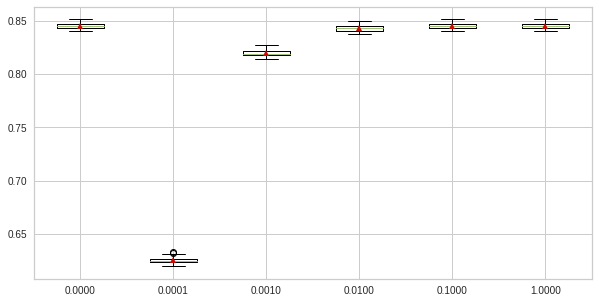

In [61]:
from sklearn.linear_model import LogisticRegression
plt.rcParams['figure.figsize'] = (10, 5)

models = get_models()
results, names = list(), list()
result_dict = {"Name":[],"mean(scores)":[],"std(scores)":[]};
for name, model in models.items(): #dict.items()  k,v
    
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    
    #print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    result_dict["Name"].append(name)
    result_dict["mean(scores)"].append(mean(scores))
    result_dict["std(scores)"].append(std(scores))
    #print(result_dict)
    
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show() #time = 2 min

**Accuracy** ou la **precision = TP / FP + TP** ie. parmi la classe predite - et + \


In [62]:
result_dict

{'Name': ['0.0000', '0.0001', '0.0010', '0.0100', '0.1000', '1.0000'],
 'mean(scores)': [0.8451272235234925,
  0.6251564094360653,
  0.8195883512560426,
  0.8430952095891552,
  0.8451849633527235,
  0.8451580142187175],
 'std(scores)': [0.0027280456894947453,
  0.003420730692816082,
  0.003609571165194282,
  0.003446579057131492,
  0.002937397057938415,
  0.002774127700299047]}

In [63]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', C=0.1000)
model.fit(X, y)#time = ok

LogisticRegression(C=0.1, multi_class='multinomial', penalty='l1',
                   solver='saga')

In [64]:
model.predict(X[:2, :])

array([4, 2])

In [65]:
model.predict_proba(X[:2, :])# probabilité d'appartenir à la classe 1, 2 ...6

array([[3.58721600e-03, 6.00915525e-06, 1.81910862e-02, 3.18179580e-02,
        9.46395367e-01, 2.36398597e-06],
       [1.26252583e-01, 8.75002460e-06, 8.68098545e-01, 5.26788396e-03,
        1.97697032e-04, 1.74541058e-04]])

In [66]:
model.score(X, y) #Return the mean accuracy on the given test data and labels.
                  #Précision 0.99 without the dbscan

0.8455081800653481

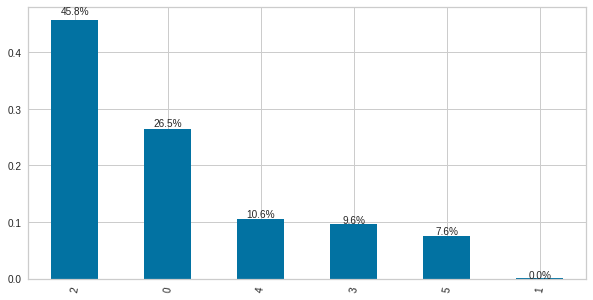

In [67]:
plt.rcParams['figure.figsize'] = (10, 5)
ax = data_unscaled["cluster"].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=80)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:0.1%}', (x + width/2, y + height*1.02), ha='center')

plt.show()

### Features importance pour label 2

**Définition coefficient Beta :**

argmax de la somme *i=1,...,n*  des log de probabilités P(Y = y_i | x_i, Beta).

Solution de la régression logistique par le maximum de vraisemblance.

La régression logistique permet d'obtenir la probabilité d'observation d'appartenir à une classe positive comme une transformation logistique d'une combinaison linéaire de variables.


**Interprétation du coefficient Beta :**

**Prédicteurs continus :**\
Le **coefficient** d'un prédicteur continu est la variation estimée du logarithme népérien des probabilités de succès pour l'événement de référence à chaque augmentation d'une unité du prédicteur.
**Par exemple, si le coefficient du temps, en secondes, est de 1,4, le logarithme népérien des probabilités de succès augmente de 1,4 pour chaque seconde supplémentaire.**


**Prédicteurs de catégorie avec codage 1, 0:**\
Le coefficient est la variation estimée du logarithme népérien des probabilités de succès lorsque l'on passe du niveau de référence au niveau correspondant au coefficient.
Par exemple, une variable de catégorie dispose des niveaux Rapide et Lent, 
et le niveau de référence est Lent. 
Si le coefficient associé au niveau Rapide est de 1,3, alors, 
**lorsque la variable passe de Lent à Rapide, le logarithme népérien de probabilités de succès de l'événement augmente de 1,3.**



**Prédicteurs de catégorie avec codage 1, 0, -1:**\
Le coefficient est la variation estimée du logarithme népérien des probabilités de succès lorsque vous passez de la moyenne du logarithme népérien des probabilités de succès au niveau du coefficient. 
Par exemple, une variable de catégorie a les niveaux Avant évolution et Après évolution. 
Si le coefficient pour Après évolution est de -2,1, le **logarithme népérien des probabilités de succès de l'événement diminue de 2,1 par rapport à la moyenne** lorsque la variable est au niveau Après évolution.

https://support.minitab.com/fr-fr/minitab/18/help-and-how-to/modeling-statistics/regression/supporting-topics/regression-models/interpreting-the-estimated-coefficients-in-binary-logistic-regression/

product_photos_qty : -1.38
product_description_lenght : -0.75
freight_value : -0.68
most_payment_type_boleto : -0.30
diff_days_to_deliver : -0.18
price : -0.14
product_name_lenght : -0.12
most_payment_type_credit_card : -0.00
part_day_afternoon : -0.00
order_count : 0.00
distances_km : 0.00
part_day_morning : 0.00
order_status_canceled : 0.00
order_status_delivered : 0.00
part_day_night : 0.00
part_day_late_nignt : 0.08
payment_total : 0.26
most_payment_type_debit_card : 0.32
most_payment_type_voucher : 0.41
diff_days_estimated-delivered : 0.45
review_score : 1.26
payment_sequential : 1.61


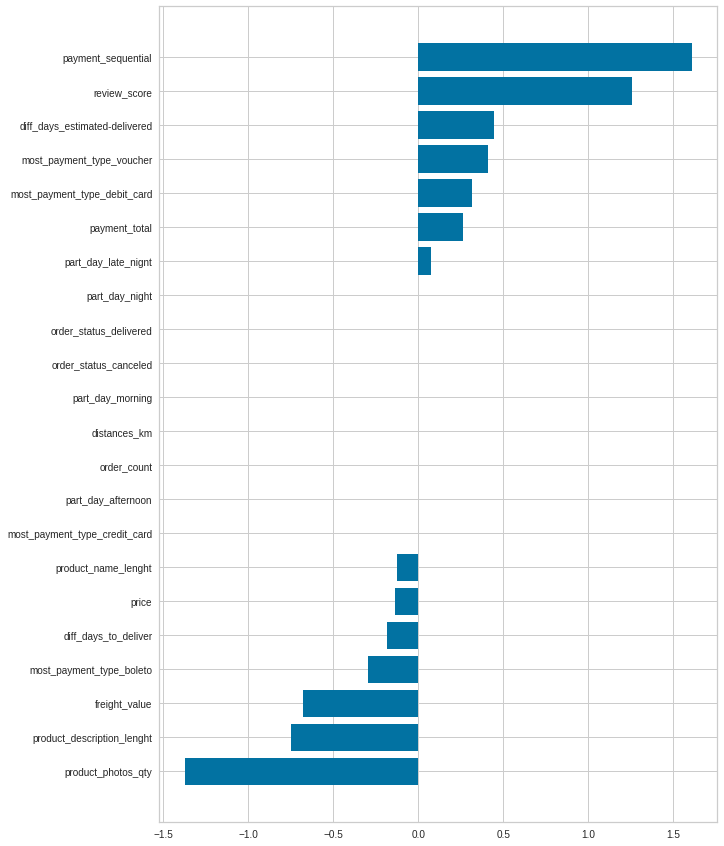

In [68]:
plt.rcParams['figure.figsize'] = (10, 15)

importance = model.coef_[2] 
features = data[data.columns[0:27]].columns
indices = np.argsort(importance) #Returns the indices that would sort an array.


for i in indices:
    print("{}".format(features[i]), ": %.2f"  % (importance[i]))
    
# plot feature importance
plt.barh([x for x in range(len(indices))], importance[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])

#pyplot.tick_params(rotation=90)
plt.show()

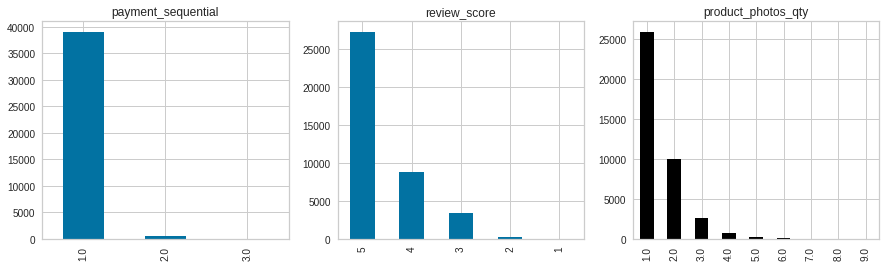

In [69]:
fig,  [ax1, ax2,ax3] = plt.subplots(1, 3, figsize=(15, 4))

pd.value_counts(data_unscaled[data_unscaled["cluster"]==2]["payment_sequential"],normalize=False).plot(kind='bar', ax=ax1)
pd.value_counts(data_unscaled[data_unscaled["cluster"]==2]["review_score"],normalize=False).plot(kind='bar', ax=ax2)
pd.value_counts(data_unscaled[data_unscaled["cluster"]==2]["product_photos_qty"],normalize=False).plot(kind='bar',color='black' ,ax=ax3)

ax1.title.set_text('payment_sequential')
ax2.title.set_text('review_score')
ax3.title.set_text('product_photos_qty')

plt.show()

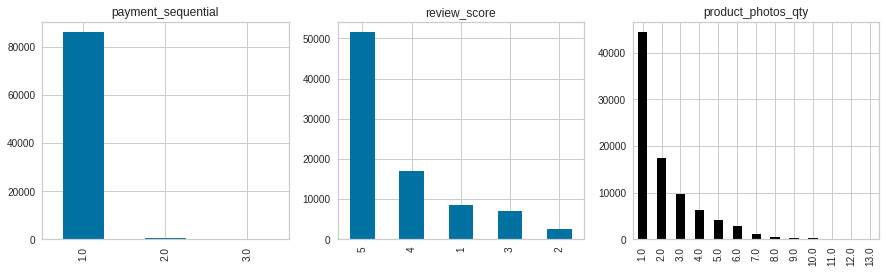

In [70]:
fig,  [ax1, ax2,ax3] = plt.subplots(1, 3, figsize=(15, 4))

pd.value_counts(data_unscaled["payment_sequential"],normalize=False).plot(kind='bar', ax=ax1)
pd.value_counts(data_unscaled["review_score"],normalize=False).plot(kind='bar', ax=ax2)
pd.value_counts(data_unscaled["product_photos_qty"],normalize=False).plot(kind='bar', color='black',ax=ax3)

ax1.title.set_text('payment_sequential')
ax2.title.set_text('review_score')
ax3.title.set_text('product_photos_qty')

plt.show()

### Features importance pour label 0

order_count : -0.69
distances_km : -0.68
part_day_late_nignt : -0.45
most_payment_type_voucher : -0.27
payment_total : -0.16
diff_days_to_deliver : 0.00
payment_sequential : 0.00
most_payment_type_debit_card : 0.00
part_day_morning : 0.00
diff_days_estimated-delivered : 0.00
order_status_canceled : 0.00
order_status_delivered : 0.00
most_payment_type_boleto : 0.00
part_day_afternoon : 0.06
product_name_lenght : 0.35
part_day_night : 0.35
freight_value : 0.51
price : 0.63
product_description_lenght : 0.89
most_payment_type_credit_card : 1.07
product_photos_qty : 1.21
review_score : 1.36


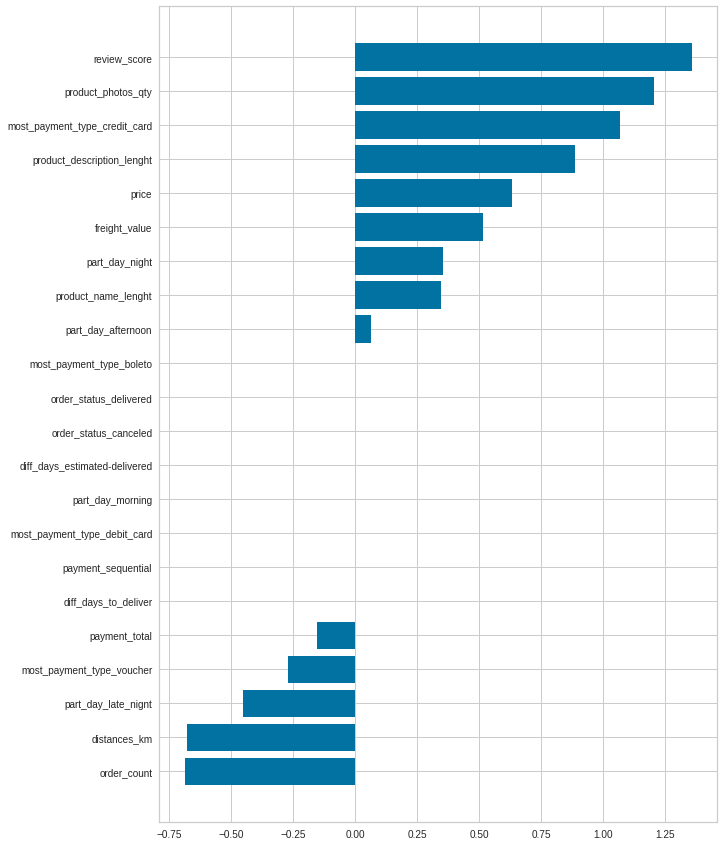

In [71]:
importance = model.coef_[0] 
features = data[data.columns[0:37]].columns
indices = np.argsort(importance)

for i in indices:
    print("{}".format(features[i]), ": %.2f"  % (importance[i]))

plt.barh([x for x in range(len(indices))], importance[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.show()

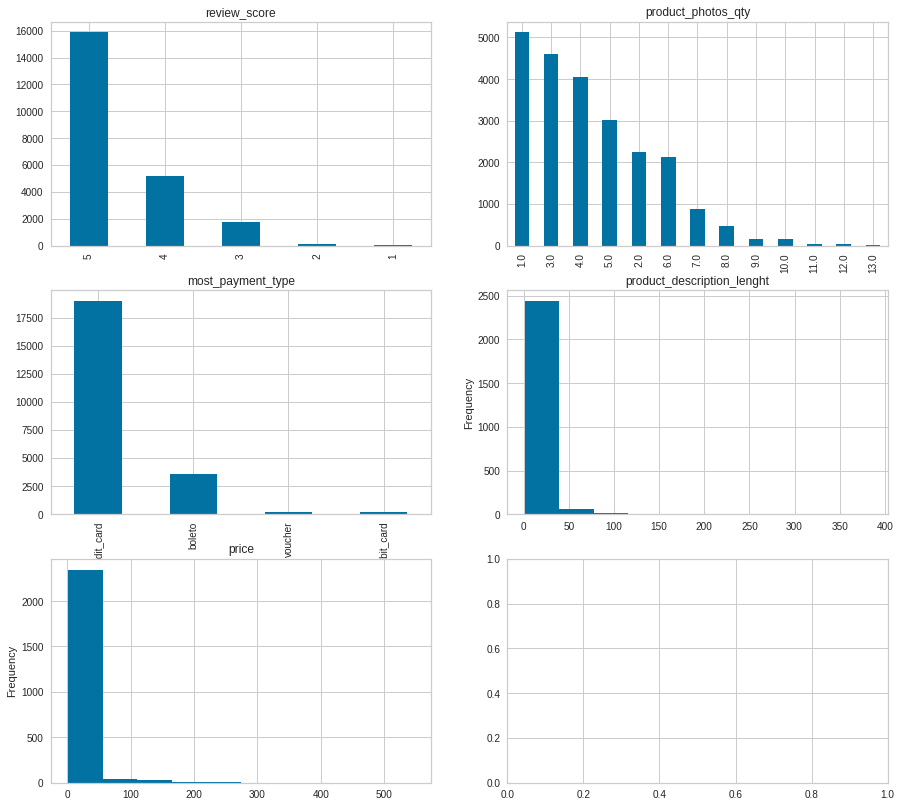

In [72]:
fig,  [[ax1, ax2], [ax3, ax4], [ax5,ax6] ] = plt.subplots(3, 2, figsize=(15, 14))

pd.value_counts(data_unscaled[data_unscaled["cluster"]==0]["review_score"],normalize=False).plot(kind='bar', ax=ax1)
pd.value_counts(data_unscaled[data_unscaled["cluster"]==0]["product_photos_qty"],normalize=False).plot(kind='bar', ax=ax2)
pd.value_counts(data_unscaled[data_unscaled["cluster"]==0]["most_payment_type"],normalize=False).plot(kind='bar', ax=ax3)
pd.value_counts(data_unscaled[data_unscaled["cluster"]==0]["product_description_lenght"],normalize=False).plot(kind='hist', ax=ax4)
pd.value_counts(data_unscaled[data_unscaled["cluster"]==0]["price"],normalize=False).plot(kind='hist', ax=ax5)




ax1.title.set_text('review_score')
ax2.title.set_text('product_photos_qty')
ax3.title.set_text('most_payment_type')
ax4.title.set_text('product_description_lenght')
ax5.title.set_text('price')
plt.show()

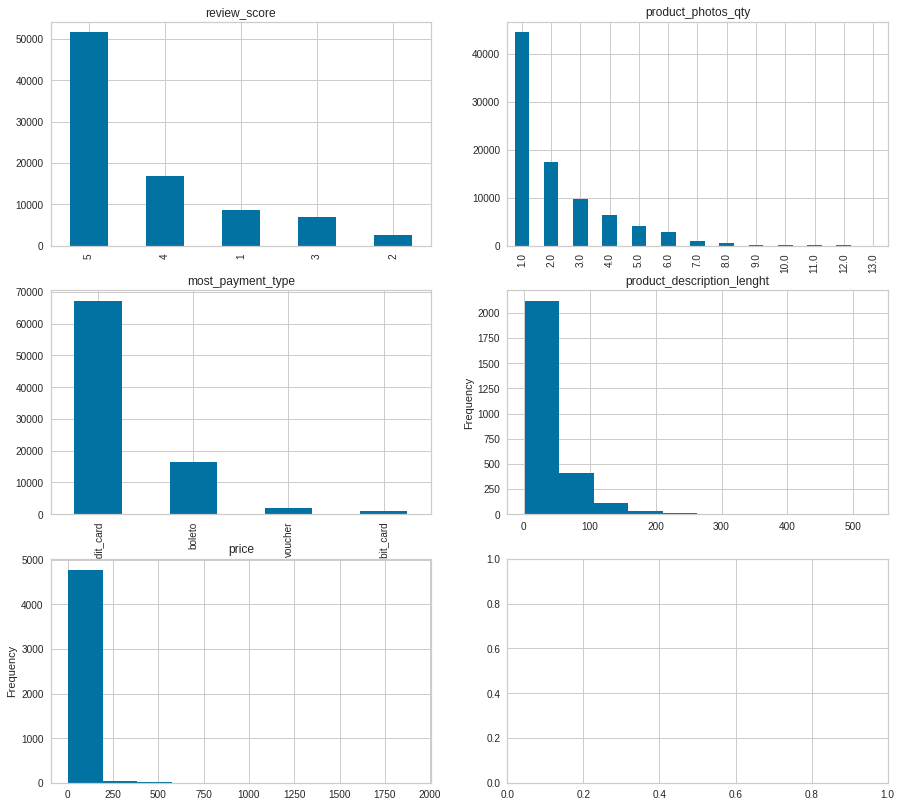

In [73]:
fig,  [[ax1, ax2], [ax3, ax4], [ax5,ax6] ] = plt.subplots(3, 2, figsize=(15, 14))

pd.value_counts(data_unscaled["review_score"],normalize=False).plot(kind='bar', ax=ax1)
pd.value_counts(data_unscaled["product_photos_qty"],normalize=False).plot(kind='bar', ax=ax2)
pd.value_counts(data_unscaled["most_payment_type"],normalize=False).plot(kind='bar', ax=ax3)
pd.value_counts(data_unscaled["product_description_lenght"],normalize=False).plot(kind='hist', ax=ax4)
pd.value_counts(data_unscaled["price"],normalize=False).plot(kind='hist', ax=ax5)




ax1.title.set_text('review_score')
ax2.title.set_text('product_photos_qty')
ax3.title.set_text('most_payment_type')
ax4.title.set_text('product_description_lenght')
ax5.title.set_text('price')
plt.show()

### Features importance pour label 4

review_score : -3.15
payment_sequential : -0.62
diff_days_to_deliver : -0.56
distances_km : -0.26
part_day_morning : -0.25
freight_value : -0.15
most_payment_type_voucher : -0.04
part_day_late_nignt : 0.00
most_payment_type_debit_card : 0.00
most_payment_type_credit_card : 0.00
order_status_delivered : 0.00
order_status_canceled : 0.00
part_day_night : 0.00
payment_total : 0.00
product_photos_qty : 0.00
product_description_lenght : 0.00
product_name_lenght : 0.00
price : 0.23
part_day_afternoon : 0.36
diff_days_estimated-delivered : 0.36
most_payment_type_boleto : 0.39
order_count : 0.81


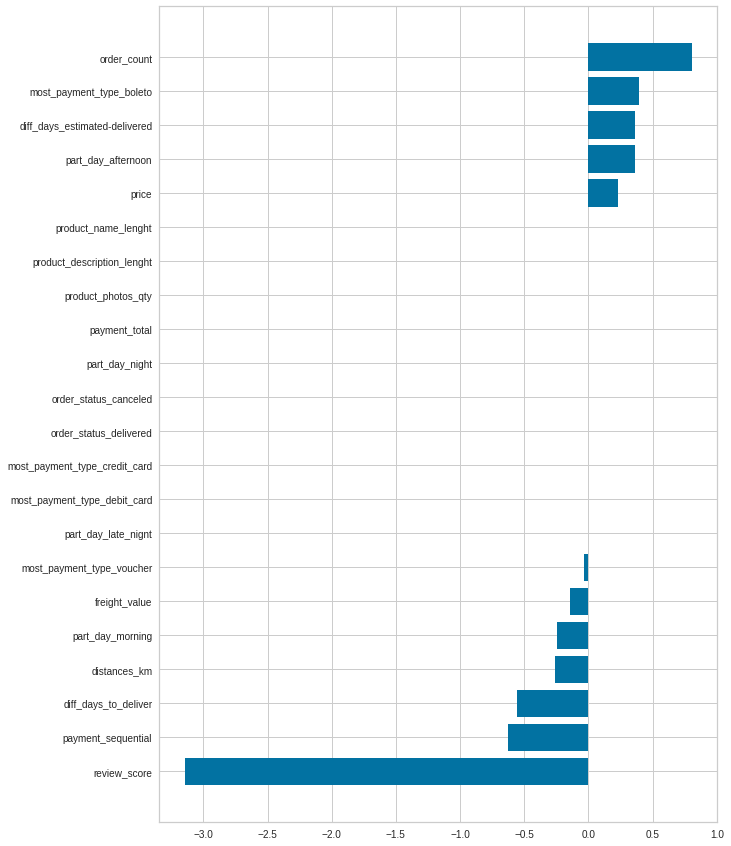

In [74]:
plt.rcParams['figure.figsize'] = (10, 15)

importance = model.coef_[4] 
features = data[data.columns[0:37]].columns
indices = np.argsort(importance)

for i in indices:
    print("{}".format(features[i]), ": %.2f"  % (importance[i]))

plt.barh([x for x in range(len(indices))], importance[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.show()

In [75]:
data_unscaled["part_day"].unique()

array(['night', 'afternoon', 'morning', 'late_nignt'], dtype=object)

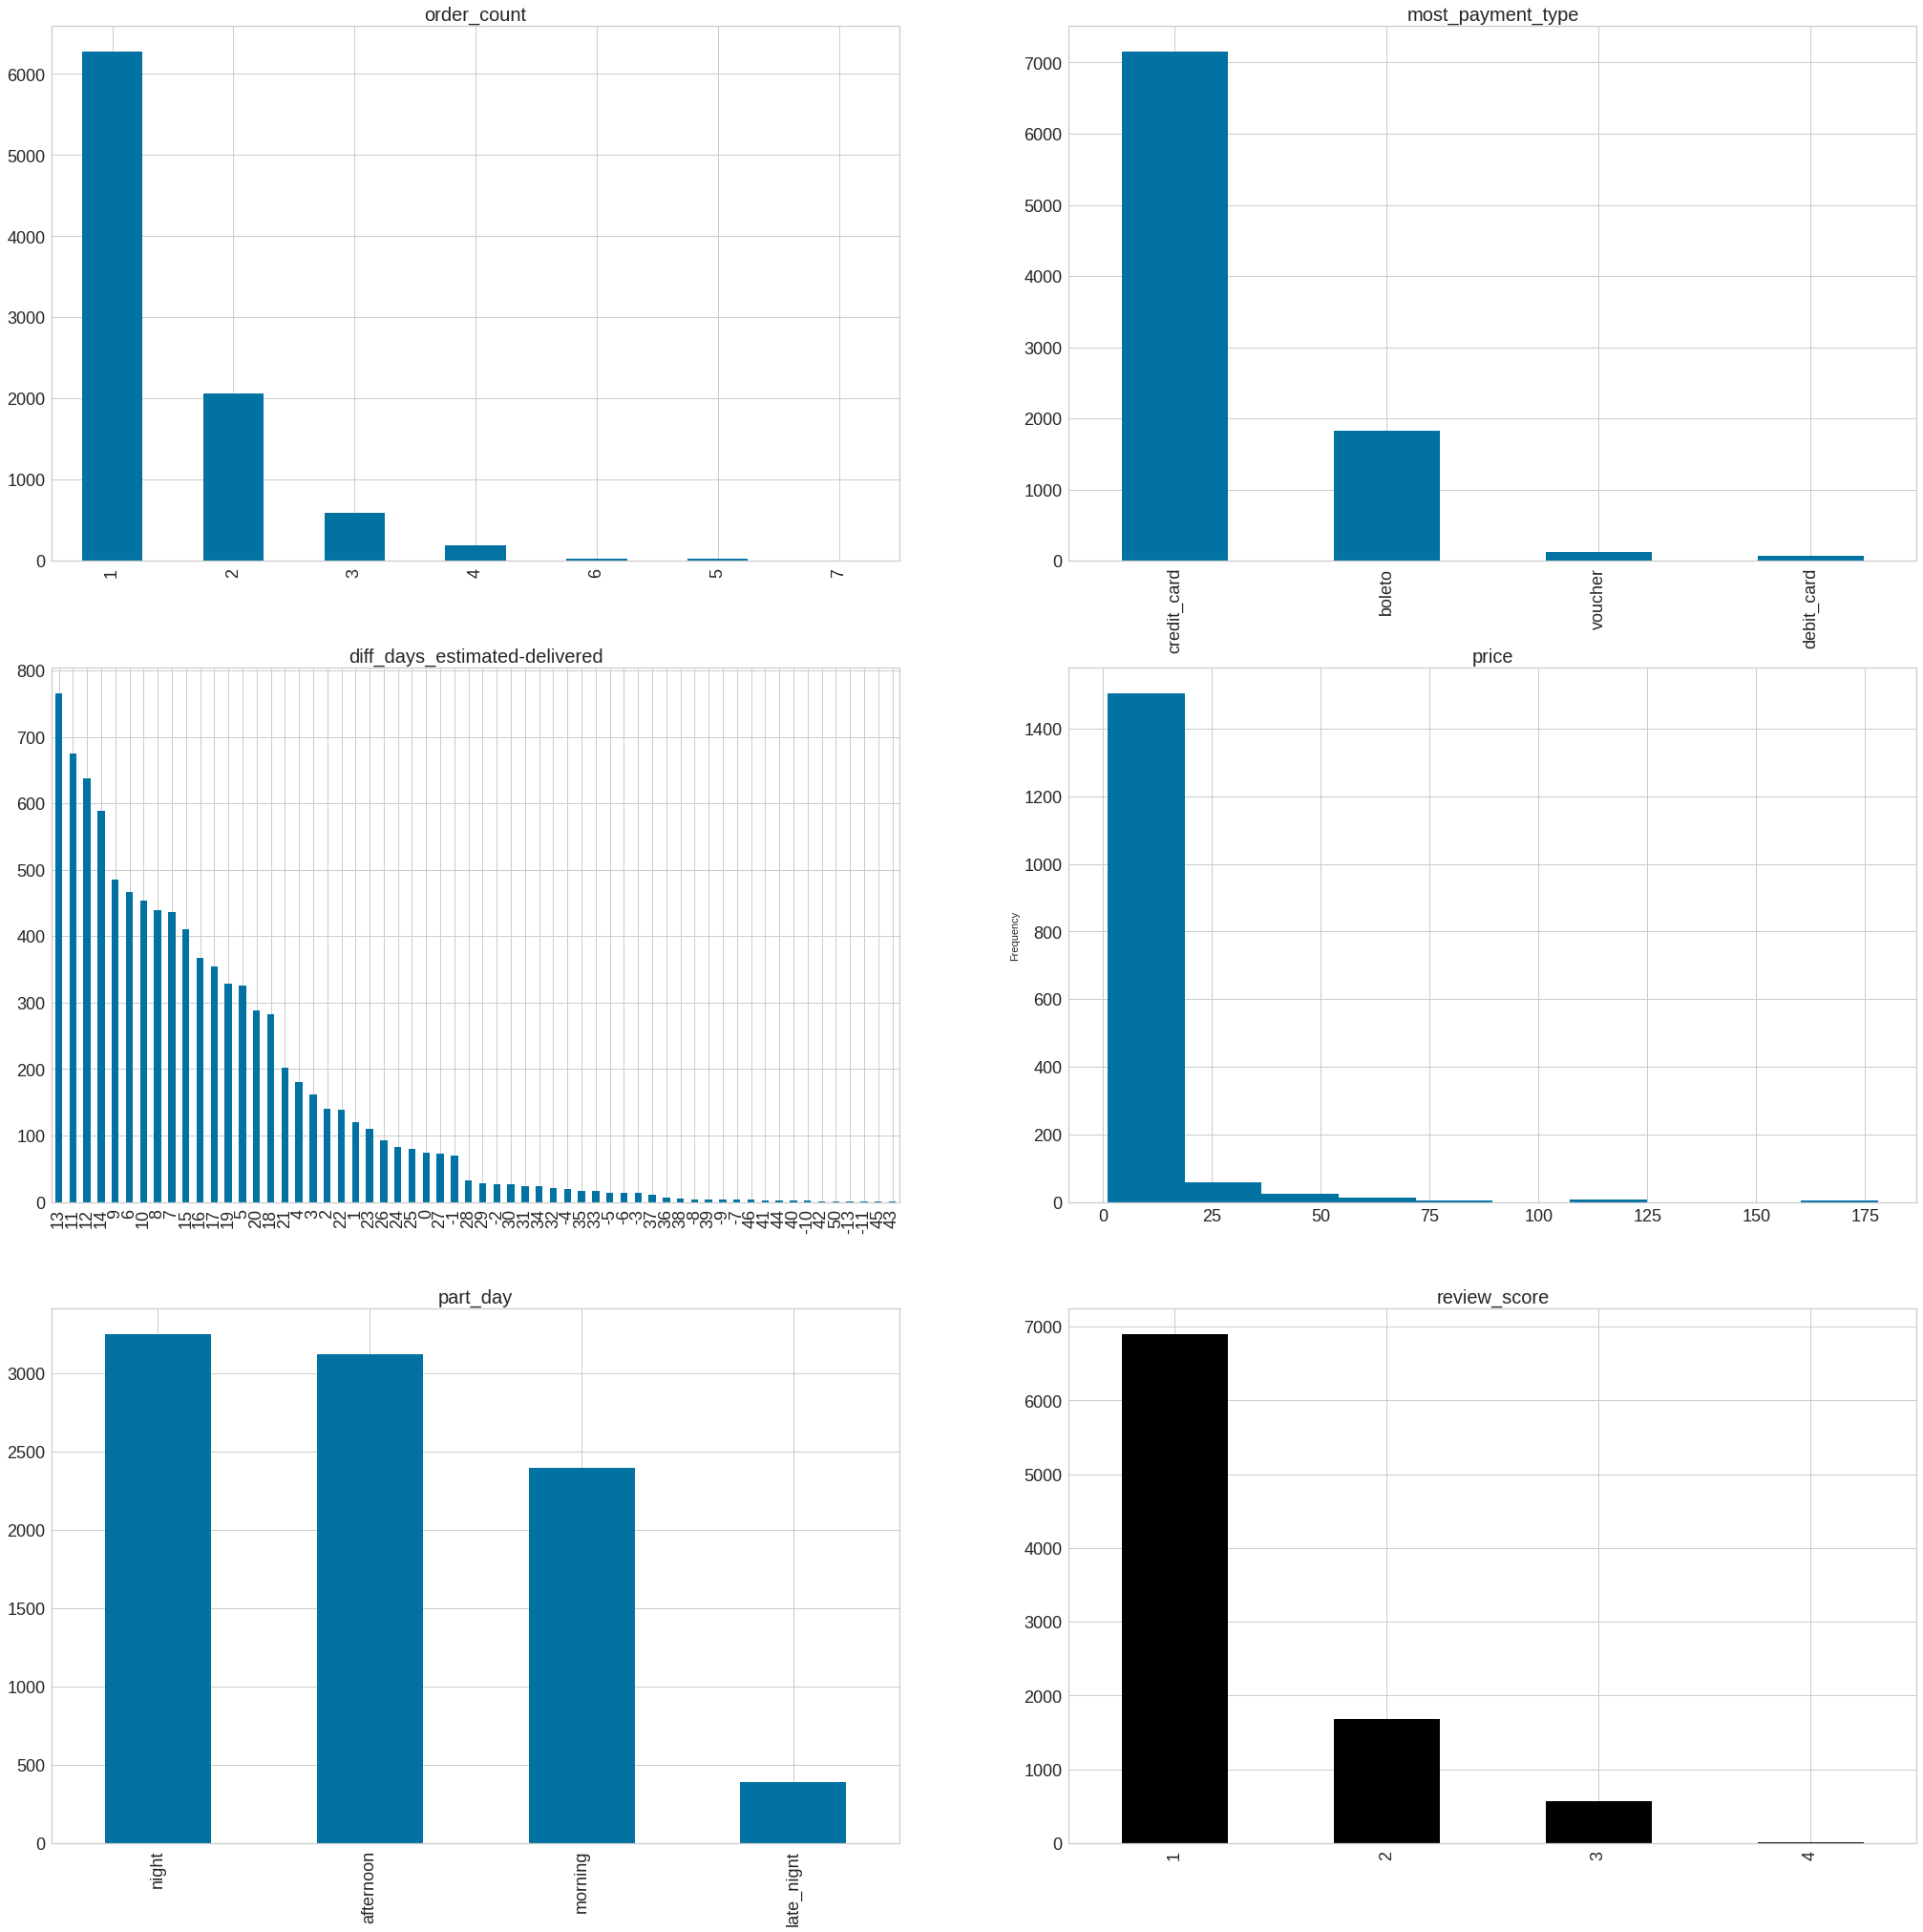

In [76]:
fig,  [[ax1, ax2],[ax3, ax4],[ax5, ax6]] = plt.subplots(3, 2,  figsize=(35, 35))

data_unscaled["diff_days_estimated-delivered"] =data_unscaled["diff_days_estimated-delivered"].astype(int)

pd.value_counts(data_unscaled[data_unscaled["cluster"]==4]["order_count"],normalize=False).plot(kind='bar',fontsize=18, ax=ax1)
pd.value_counts(data_unscaled[data_unscaled["cluster"]==4]["most_payment_type"],normalize=False).plot(kind='bar', fontsize=18,ax=ax2)
pd.value_counts(data_unscaled[data_unscaled["cluster"]==4]["diff_days_estimated-delivered"],sort=False,normalize=False).sort_values(ascending=False).plot(kind='bar',fontsize=18, ax=ax3)
pd.value_counts(data_unscaled[data_unscaled["cluster"]==4]["price"],normalize=False).plot(kind='hist', fontsize=18,ax=ax4)
pd.value_counts(data_unscaled[data_unscaled["cluster"]==4]["part_day"],normalize=False).plot(kind='bar', fontsize=18,ax=ax5)

pd.value_counts(data_unscaled[data_unscaled["cluster"]==4]["review_score"],normalize=False).plot(kind='bar',color='black',fontsize=18, ax=ax6)

ax1.set_title('order_count',fontsize=20)
ax2.set_title('most_payment_type',fontsize=20)
ax3.set_title('diff_days_estimated-delivered',fontsize=20)
ax4.set_title('price',fontsize=20)
ax5.set_title('part_day',fontsize=20)
ax6.set_title('review_score',fontsize=20)
plt.show()

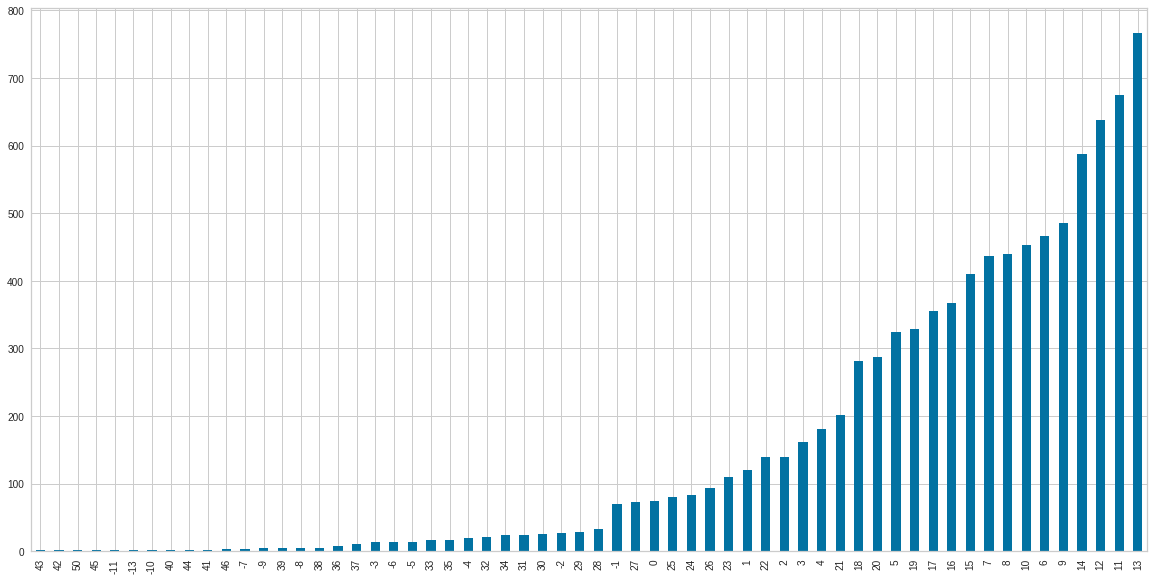

In [77]:
plt.rcParams['figure.figsize'] = (20, 10)
pd.value_counts(data_unscaled[data_unscaled["cluster"]==4]["diff_days_estimated-delivered"],normalize=False).sort_values(ascending=True).plot(kind='bar',fontsize=10)
plt.show()

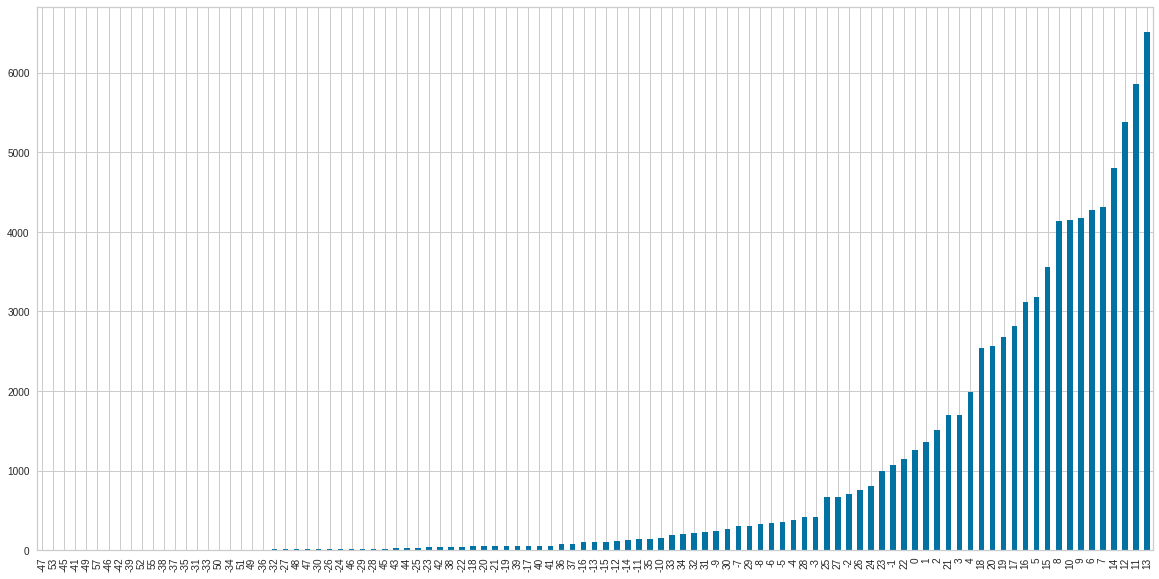

In [78]:
plt.rcParams['figure.figsize'] = (20, 10)
pd.value_counts(data_unscaled["diff_days_estimated-delivered"],normalize=False).sort_values(ascending=True).plot(kind='bar',fontsize=10)
plt.show()

<AxesSubplot:>

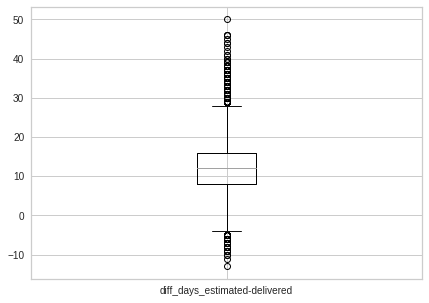

In [79]:
plt.rcParams['figure.figsize'] = (7, 5)
data_unscaled[data_unscaled["cluster"]==4].boxplot(column="diff_days_estimated-delivered")

<AxesSubplot:>

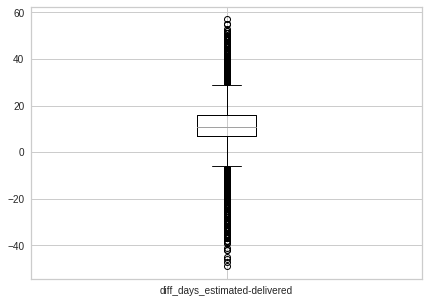

In [80]:
plt.rcParams['figure.figsize'] = (7, 5)
data_unscaled.boxplot(column="diff_days_estimated-delivered")

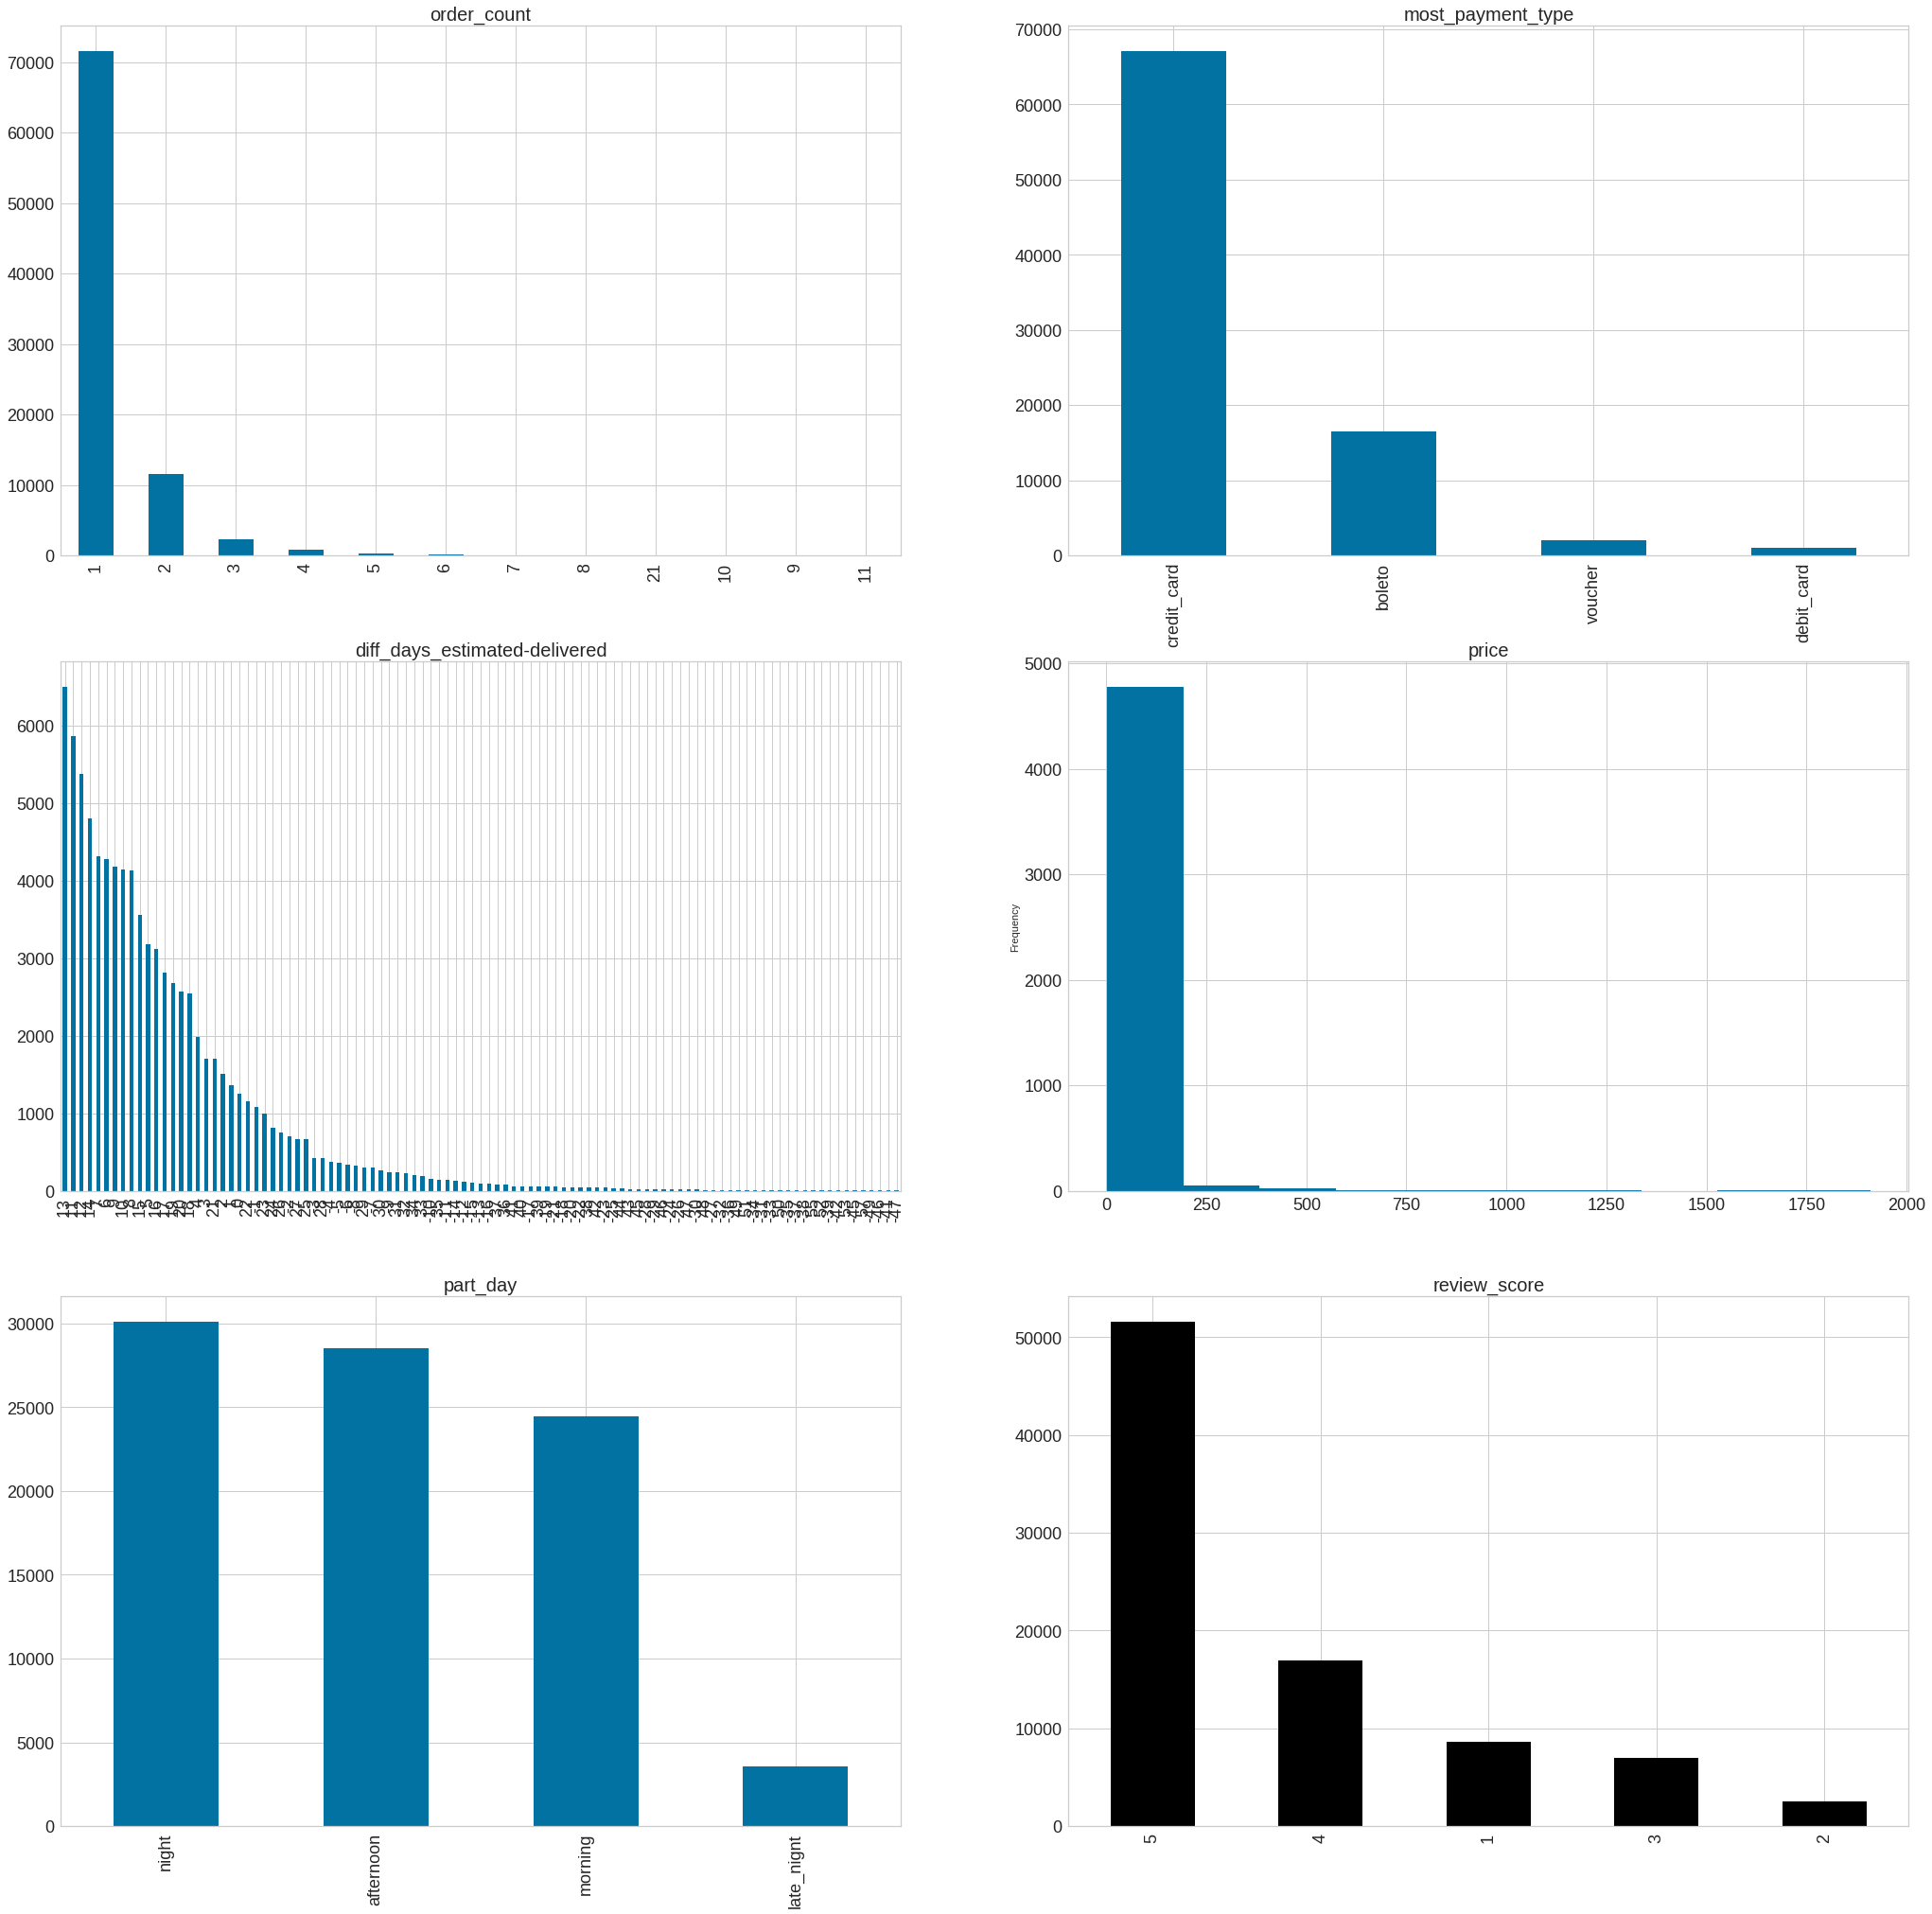

In [81]:
fig,  [[ax1, ax2],[ax3, ax4],[ax5, ax6]] = plt.subplots(3, 2,  figsize=(35, 35))

data_unscaled["diff_days_estimated-delivered"] =data_unscaled["diff_days_estimated-delivered"].astype(int)

pd.value_counts(data_unscaled["order_count"],normalize=False).plot(kind='bar',fontsize=18, ax=ax1)
pd.value_counts(data_unscaled["most_payment_type"],normalize=False).plot(kind='bar', fontsize=18,ax=ax2)
pd.value_counts(data_unscaled["diff_days_estimated-delivered"],sort=False,normalize=False).sort_values(ascending=False).plot(kind='bar',fontsize=18, ax=ax3)
pd.value_counts(data_unscaled["price"],normalize=False).plot(kind='hist', fontsize=18,ax=ax4)
pd.value_counts(data_unscaled["part_day"],normalize=False).plot(kind='bar', fontsize=18,ax=ax5)

pd.value_counts(data_unscaled["review_score"],normalize=False).plot(kind='bar',color='black',fontsize=18, ax=ax6)

ax1.set_title('order_count',fontsize=20)
ax2.set_title('most_payment_type',fontsize=20)
ax3.set_title('diff_days_estimated-delivered',fontsize=20)
ax4.set_title('price',fontsize=20)
ax5.set_title('part_day',fontsize=20)
ax6.set_title('review_score',fontsize=20)
plt.show()

### Features importance pour label 3

diff_days_estimated-delivered : -1.64
product_photos_qty : -1.64
freight_value : -0.85
price : -0.44
order_count : -0.38
part_day_night : -0.35
product_description_lenght : -0.28
most_payment_type_debit_card : -0.25
payment_total : -0.21
payment_sequential : 0.00
order_status_canceled : 0.00
order_status_delivered : 0.00
most_payment_type_boleto : 0.00
part_day_afternoon : 0.00
most_payment_type_voucher : 0.04
most_payment_type_credit_card : 0.07
distances_km : 0.10
part_day_morning : 0.26
part_day_late_nignt : 0.32
product_name_lenght : 0.32
review_score : 0.33
diff_days_to_deliver : 2.73


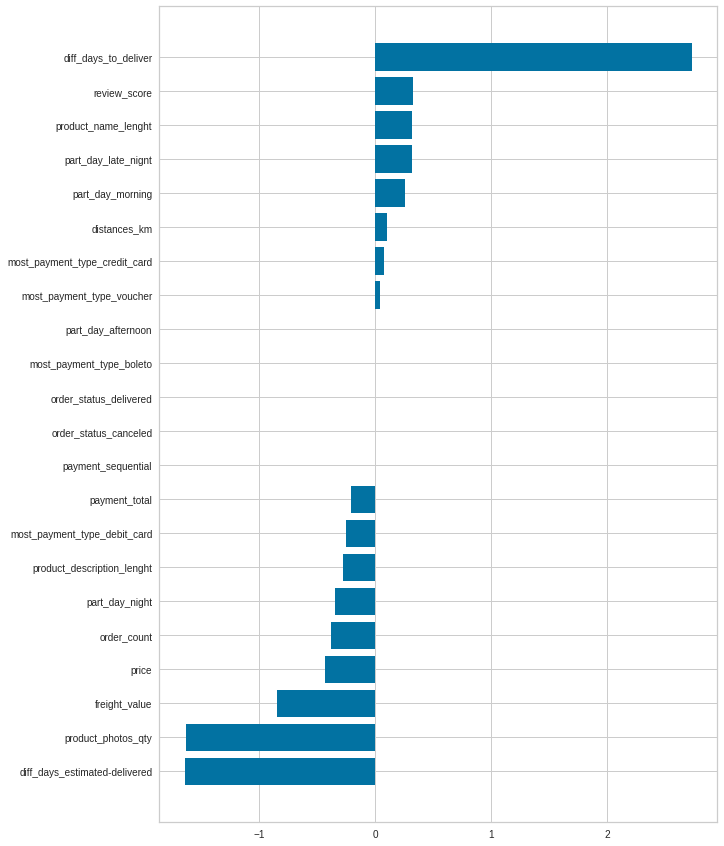

In [82]:
plt.rcParams['figure.figsize'] = (10, 15)

importance = model.coef_[3] 
features = data[data.columns[0:37]].columns
indices = np.argsort(importance)

for i in indices:
    print("{}".format(features[i]), ": %.2f"  % (importance[i]))

plt.barh([x for x in range(len(indices))], importance[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.show()

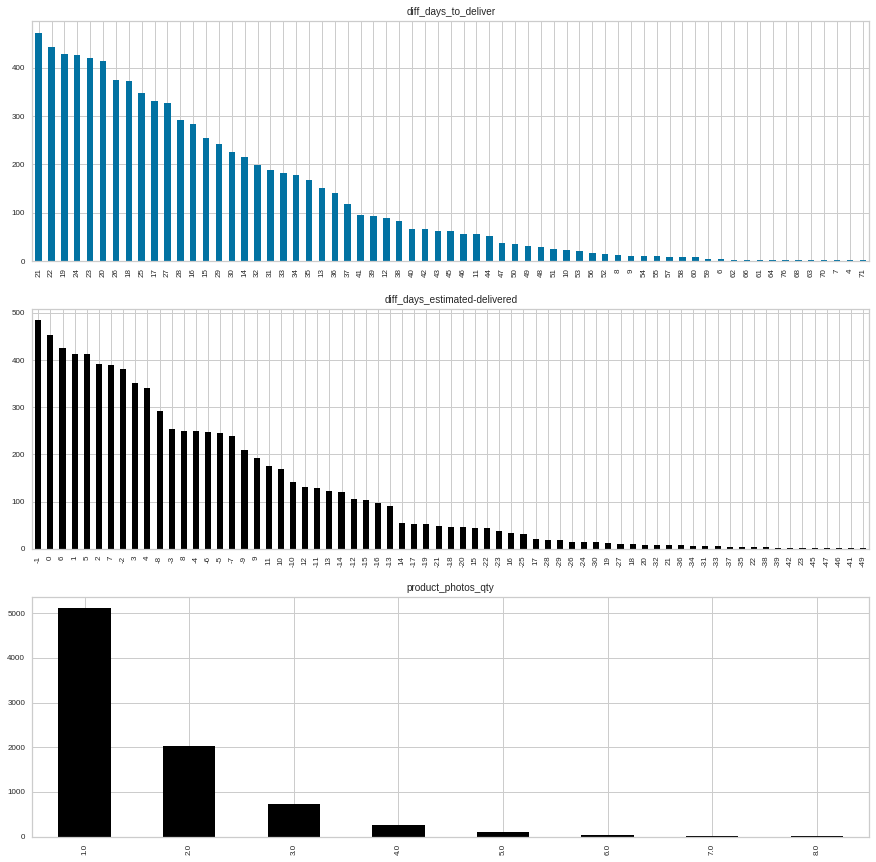

In [83]:
fig,  [ax1, ax2, ax3] = plt.subplots(3, 1,  figsize=(15, 15))

data_unscaled["diff_days_to_deliver"] = data_unscaled["diff_days_to_deliver"].astype(int)

pd.value_counts(data_unscaled[data_unscaled["cluster"]==3]["diff_days_to_deliver"],normalize=False).plot(kind='bar',fontsize=8, ax=ax1)
pd.value_counts(data_unscaled[data_unscaled["cluster"]==3]["diff_days_estimated-delivered"],normalize=False).plot(kind='bar', color='black',fontsize=8,ax=ax2)
pd.value_counts(data_unscaled[data_unscaled["cluster"]==3]["product_photos_qty"],sort=False,normalize=False).sort_values(ascending=False).plot(kind='bar',color='black',fontsize=8, ax=ax3)

ax1.set_title('diff_days_to_deliver',fontsize=10)
ax2.set_title('diff_days_estimated-delivered',fontsize=10)
ax3.set_title('product_photos_qty',fontsize=10)

plt.show()

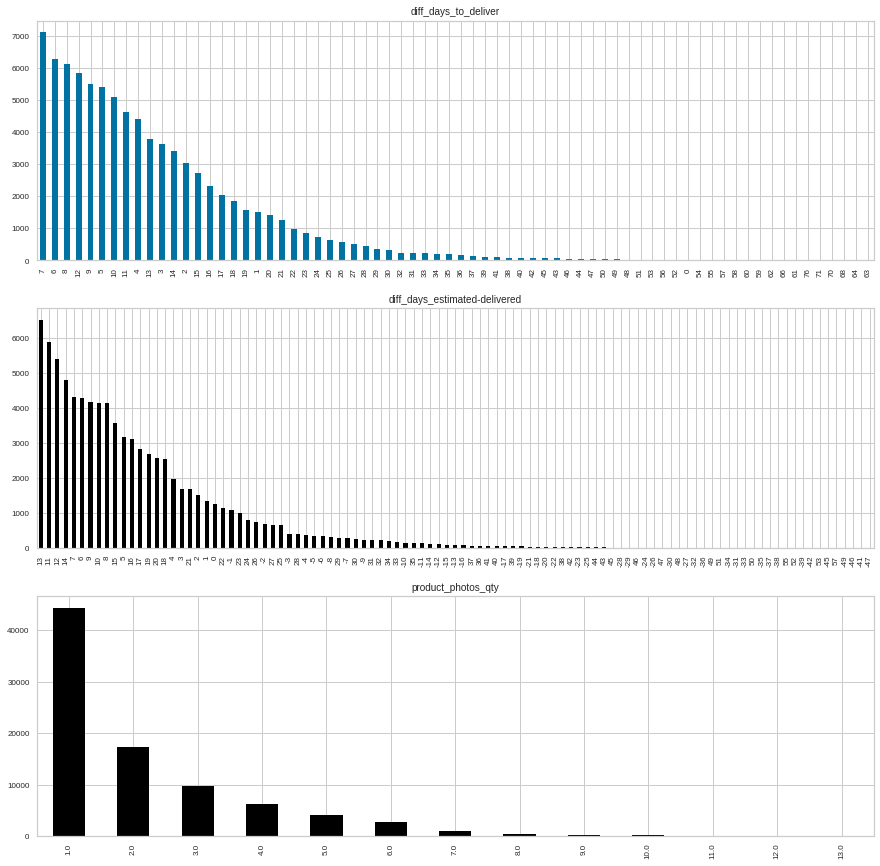

In [84]:
fig,  [ax1, ax2, ax3] = plt.subplots(3, 1,  figsize=(15, 15))

data_unscaled["diff_days_to_deliver"] = data_unscaled["diff_days_to_deliver"].astype(int)

pd.value_counts(data_unscaled["diff_days_to_deliver"],normalize=False).plot(kind='bar',fontsize=8, ax=ax1)
pd.value_counts(data_unscaled["diff_days_estimated-delivered"],normalize=False).plot(kind='bar', color='black',fontsize=8,ax=ax2)
pd.value_counts(data_unscaled["product_photos_qty"],sort=False,normalize=False).sort_values(ascending=False).plot(kind='bar',color='black',fontsize=8, ax=ax3)

ax1.set_title('diff_days_to_deliver',fontsize=10)
ax2.set_title('diff_days_estimated-delivered',fontsize=10)
ax3.set_title('product_photos_qty',fontsize=10)

plt.show()

<AxesSubplot:>

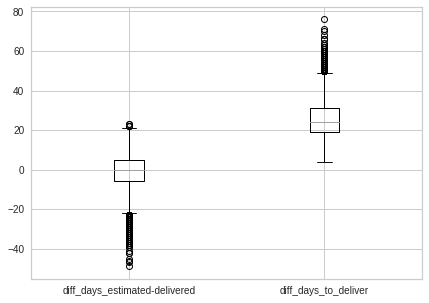

In [85]:
plt.rcParams['figure.figsize'] = (7, 5)
data_unscaled[data_unscaled["cluster"]==3].boxplot(column=["diff_days_estimated-delivered","diff_days_to_deliver"])

<AxesSubplot:>

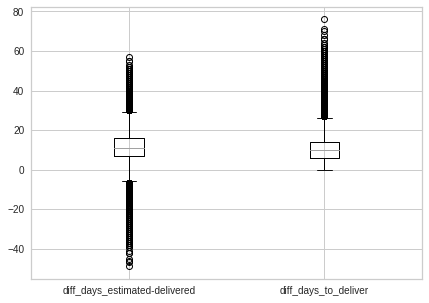

In [86]:
plt.rcParams['figure.figsize'] = (7, 5)
data_unscaled.boxplot(column=["diff_days_estimated-delivered","diff_days_to_deliver"])

### Features importance pour label 5

product_name_lenght : -0.34
review_score : -0.30
diff_days_estimated-delivered : -0.10
price : 0.00
part_day_late_nignt : 0.00
part_day_afternoon : 0.00
most_payment_type_voucher : 0.00
most_payment_type_debit_card : 0.00
most_payment_type_credit_card : 0.00
order_status_delivered : 0.00
order_status_canceled : 0.00
part_day_night : 0.00
payment_total : 0.00
order_count : 0.00
payment_sequential : 0.00
most_payment_type_boleto : 0.16
product_description_lenght : 0.38
product_photos_qty : 0.42
diff_days_to_deliver : 0.49
freight_value : 0.85
part_day_morning : 0.87
distances_km : 4.59


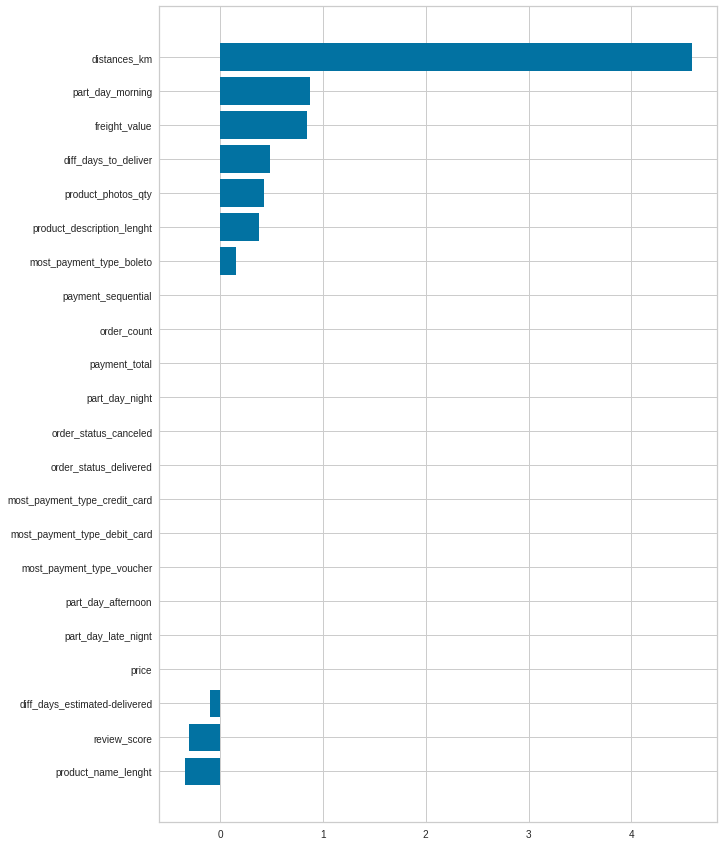

In [87]:
plt.rcParams['figure.figsize'] = (10, 15)

importance = model.coef_[5] 
features = data[data.columns[0:37]].columns
indices = np.argsort(importance)

for i in indices:
    print("{}".format(features[i]), ": %.2f"  % (importance[i]))

plt.barh([x for x in range(len(indices))], importance[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.show()

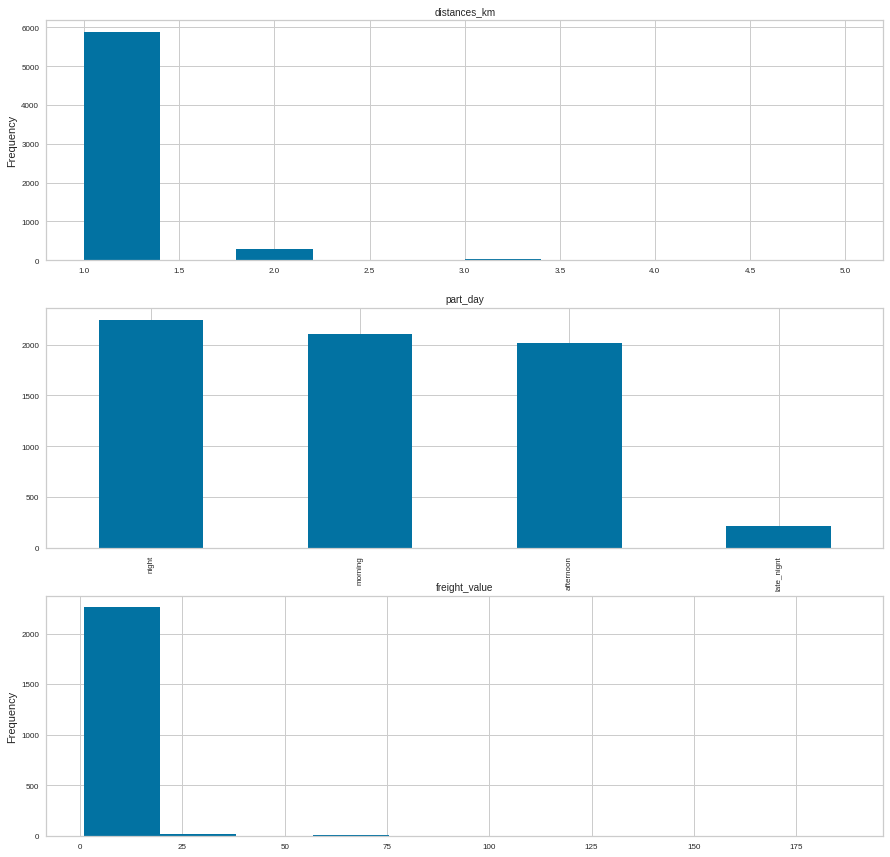

In [88]:
fig,  [ax1, ax2, ax3] = plt.subplots(3, 1,  figsize=(15, 15))



pd.value_counts(data_unscaled[data_unscaled["cluster"]==5]["distances_km"],normalize=False).plot(kind='hist',fontsize=8, ax=ax1)
pd.value_counts(data_unscaled[data_unscaled["cluster"]==5]["part_day"],normalize=False).plot(kind='bar',fontsize=8,ax=ax2)
pd.value_counts(data_unscaled[data_unscaled["cluster"]==5]["freight_value"],sort=False,normalize=False).sort_values(ascending=False).plot(kind='hist',fontsize=8, ax=ax3)

ax1.set_title('distances_km',fontsize=10)
ax2.set_title('part_day',fontsize=10)
ax3.set_title('freight_value',fontsize=10)

plt.show()

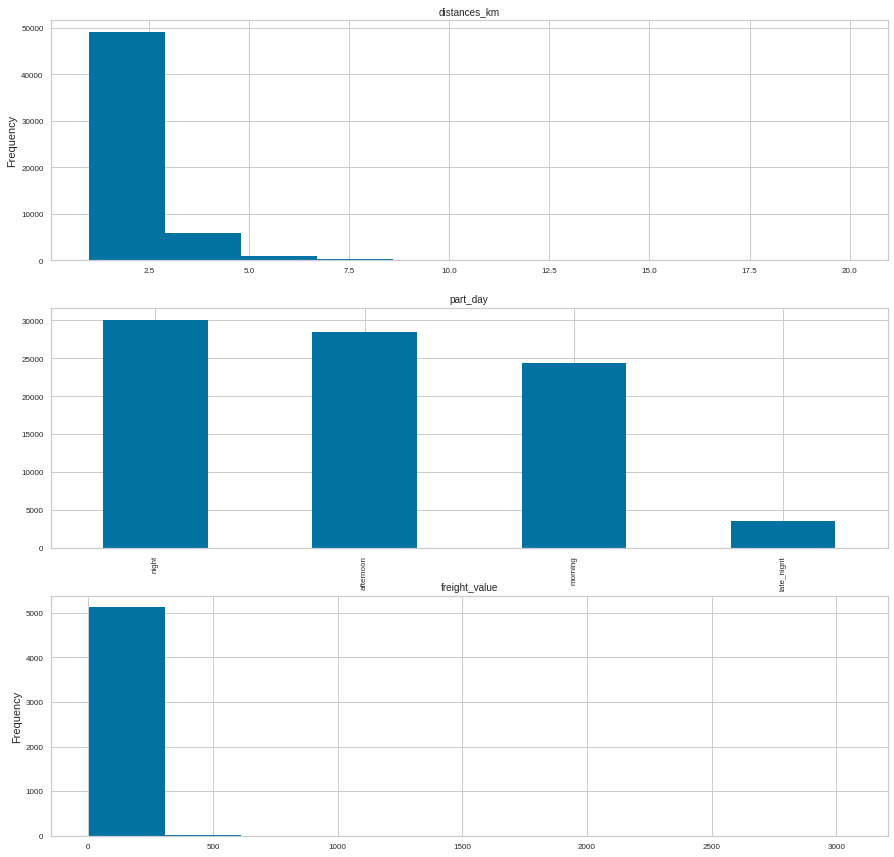

In [89]:
fig,  [ax1, ax2, ax3] = plt.subplots(3, 1,  figsize=(15, 15))



pd.value_counts(data_unscaled["distances_km"],normalize=False).plot(kind='hist',fontsize=8, ax=ax1)
pd.value_counts(data_unscaled["part_day"],normalize=False).plot(kind='bar',fontsize=8,ax=ax2)
pd.value_counts(data_unscaled["freight_value"],sort=False,normalize=False).sort_values(ascending=False).plot(kind='hist',fontsize=8, ax=ax3)

ax1.set_title('distances_km',fontsize=10)
ax2.set_title('part_day',fontsize=10)
ax3.set_title('freight_value',fontsize=10)

plt.show()

<AxesSubplot:>

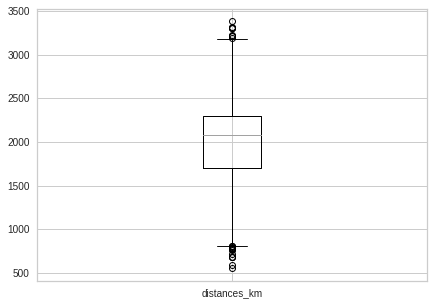

In [90]:
plt.rcParams['figure.figsize'] = (7, 5)
data_unscaled[data_unscaled["cluster"]==5].boxplot(column=["distances_km"])

<AxesSubplot:>

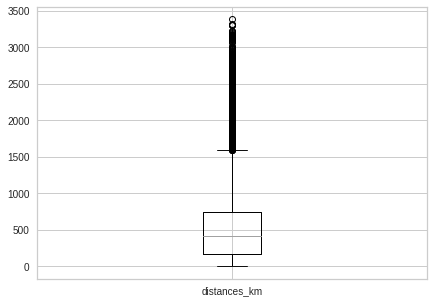

In [91]:
plt.rcParams['figure.figsize'] = (7, 5)
data_unscaled.boxplot(column=["distances_km"])

<AxesSubplot:>

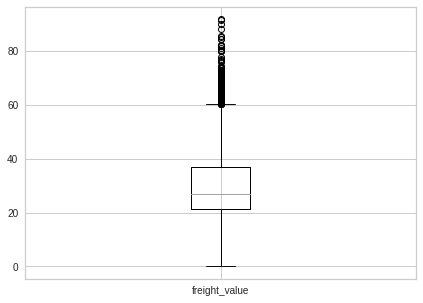

In [92]:
plt.rcParams['figure.figsize'] = (7, 5)
data_unscaled[data_unscaled["cluster"]==5].boxplot(column=["freight_value"])

<AxesSubplot:>

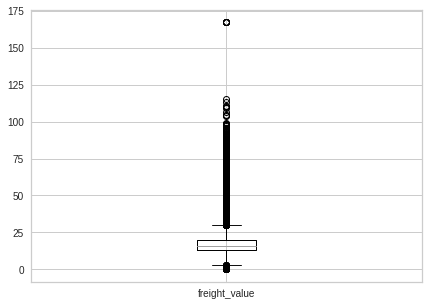

In [93]:
plt.rcParams['figure.figsize'] = (7, 5)
data_unscaled.boxplot(column=["freight_value"])

# <font color="#1d479b">Sources</font>

3D plot avec catégories :\
https://stackoverflow.com/questions/66183999/how-to-make-3d-scatter-plot-with-a-hue

Clustering en deux phases:\
https://www.dummies.com/programming/big-data/data-science/data-science-performing-hierarchical-clustering-with-python/

Pour la visualisation avec PCA:\
https://towardsdatascience.com/cluster-analysis-create-visualize-and-interpret-customer-segments-474e55d00ebb
https://www.kaggle.com/minc33/visualizing-high-dimensional-clusters

Pour trouver n_clusters :\
https://towardsdatascience.com/k-means-dbscan-gmm-agglomerative-clustering-mastering-the-popular-models-in-a-segmentation-c891a3818e29

Le dendogramme :\
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

Evaluation des modèles de clustering:\
https://towardsdatascience.com/k-means-dbscan-gmm-agglomerative-clustering-mastering-the-popular-models-in-a-segmentation-c891a3818e29

Tuning avec la réfression logistique:\
https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

Visualisation du DBSCAN:\
https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/
